In [ ]:
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .
Task: One of Classification and other of Regression
Do both tasks in the same .ipynb file and submit at single file. 


In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
df=pd.read_csv(r"C:\Users\bee\Desktop\Data set\avocado.csv")

In [3]:
#first five records of the data
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [4]:
#last five records of the data
df.tail()

Unnamed: 0        Date  AveragePrice  Total Volume     4046     4225  \
18244           7  2018-02-04          1.63      17074.83  2046.96  1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70  3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92  2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63  2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77  2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    0.00    13498.67    13066.82      431.85          0.0  organic  2018   
18245    0.00     9264.84     8940.04      324.80          0.0  organic  2018   
18246  727.94     9394.11     9351.80       42.31          0.0  organic  2018   
18247  727.01    10969.54    10919.54       50.00          0.0  organic  2018   
18248  224.53    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [5]:
#checking the shape of the data
#there are 18249 rows and 14
df.shape


(18249, 14)

In [6]:
df.dtypes#Checking the data types of all columns
#the following columns namely Average price,Total Volume,4046,4225,4770,Total Bags,Small Bags and Xlarge bags have decimal places
#the date column and region respectively have object data 
#the year and unnamed columns have integer values



Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [7]:
#Checking information about the dataset
df.info()#there are 14 columns in the data,9 of which are Float64,3 are object and 2 are int64.The data uses above 1.9MB memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [8]:
#checking columns of dataset
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [9]:
# Renaming PLU code columns
#I have renamed the columns on the basis that the summation of these three columns gives the value in the total bags column.,So I simply matched the column names after the total bags column
df.rename(columns={'4046':'Small(4046)','4225':'Large(4225)','4770':'Extra_Large(4770)'},inplace=True)
df

Unnamed: 0        Date  AveragePrice  Total Volume  Small(4046)  \
0               0  2015-12-27          1.33      64236.62      1036.74   
1               1  2015-12-20          1.35      54876.98       674.28   
2               2  2015-12-13          0.93     118220.22       794.70   
3               3  2015-12-06          1.08      78992.15      1132.00   
4               4  2015-11-29          1.28      51039.60       941.48   
...           ...         ...           ...           ...          ...   
18244           7  2018-02-04          1.63      17074.83      2046.96   
18245           8  2018-01-28          1.71      13888.04      1191.70   
18246           9  2018-01-21          1.87      13766.76      1191.92   
18247          10  2018-01-14          1.93      16205.22      1527.63   
18248          11  2018-01-07          1.62      17489.58      2894.77   

       Large(4225)  Extra_Large(4770)  Total Bags  Small Bags  Large Bags  \
0         54454.85              48.16     8696.87     8603.62       93.25   
1         44638.81              58.33     9505.56     9408.07       97.49   
2        109149.67             130.50     8145.35     8042.21      103.14   
3         71976.41              72.58     5811.16     5677.40      133.76   
4         43838.39              75.78     6183.95     5986.26      197.69   
...            ...                ...         ...         ...         ...   
18244      1529.20               0.00    13498.67    13066.82      431.85   
18245      3431.50               0.00     9264.84     8940.04      324.80   
18246      2452.79             727.94     9394.11     9351.80       42.31   
18247      2981.04             727.01    10969.54    10919.54       50.00   
18248      2356.13             224.53    12014.15    11988.14       26.01   

       XLarge Bags          type  year            region  
0              0.0  conventional  2015            Albany  
1              0.0  conventional  2015            Albany  
2              0.0  conventional  2015            Albany  
3              0.0  conventional  2015            Albany  
4              0.0  conventional  2015            Albany  
...            ...           ...   ...               ...  
18244          0.0       organic  2018  WestTexNewMexico  
18245          0.0       organic  2018  WestTexNewMexico  
18246          0.0       organic  2018  WestTexNewMexico  
18247          0.0       organic  2018  WestTexNewMexico  
18248          0.0       organic  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [10]:
#check columns after renaming
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', 'Small(4046)',
       'Large(4225)', 'Extra_Large(4770)', 'Total Bags', 'Small Bags',
       'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

# Create separate columns for month and day
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [12]:
#Dropping unnecesary columns.'Unnamed column is index numbers,we already have this by default in the pandas data frame.Date is dropped and replaced by month and day.
#I will also drop the date column it was  replaced  by two seperate columns namely Day and month to get a seperate view when analysing the data
df.drop(['Unnamed: 0','Date'], axis=1, inplace=True)

In [13]:
df.shape#check the shape of the date after removing and changing columns

(18249, 14)

In [14]:
#check if the datatype and columns changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AveragePrice       18249 non-null  float64
 1   Total Volume       18249 non-null  float64
 2   Small(4046)        18249 non-null  float64
 3   Large(4225)        18249 non-null  float64
 4   Extra_Large(4770)  18249 non-null  float64
 5   Total Bags         18249 non-null  float64
 6   Small Bags         18249 non-null  float64
 7   Large Bags         18249 non-null  float64
 8   XLarge Bags        18249 non-null  float64
 9   type               18249 non-null  object 
 10  year               18249 non-null  int64  
 11  region             18249 non-null  object 
 12  month              18249 non-null  int64  
 13  day                18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [15]:
#date column has been replace by month and day with int64 data type respectively
#9 columns are float64,3 are int64 and 1 is object

In [15]:
#Checking Duplicate value in data set
print("Total Duplicate Rows are",df.duplicated().sum())# no duplicates

Total Duplicate Rows are 0


In [16]:
#Checking unique values of each columns
df.nunique().to_frame("No. of Unique values")#I can clearly see the number of uniques values per each column

No. of Unique values
AveragePrice                        259
Total Volume                      18237
Small(4046)                       17702
Large(4225)                       18103
Extra_Large(4770)                 12071
Total Bags                        18097
Small Bags                        17321
Large Bags                        15082
XLarge Bags                        5588
type                                  2
year                                  4
region                               54
month                                12
day                                  31

In [17]:
#checking the value of count of each column(this is to get count of frequency of each unique value in column)
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: Small(4046), Length: 17702, dtype: int64


0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: Large(4225), Length: 18103, dtype: int64


0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.5

In [ ]:
The most common average price is 1.15, appearing 202 times.

The most common total volume is 4103.97, appearing 2 times.

The most common value in the following columns respectively Small,Large,Extra Large,Total Bags,Small bags,Large bags 
is and Extra large bags 0.00.

There are four unique years in the analysis from 2015 to 2018.The most common year is 2017.

There are twelve unique months in the respective column for a calendar year from January to December with January recording the most data entries

The day column comprises 31 days representing a full month with ezch day having various counts

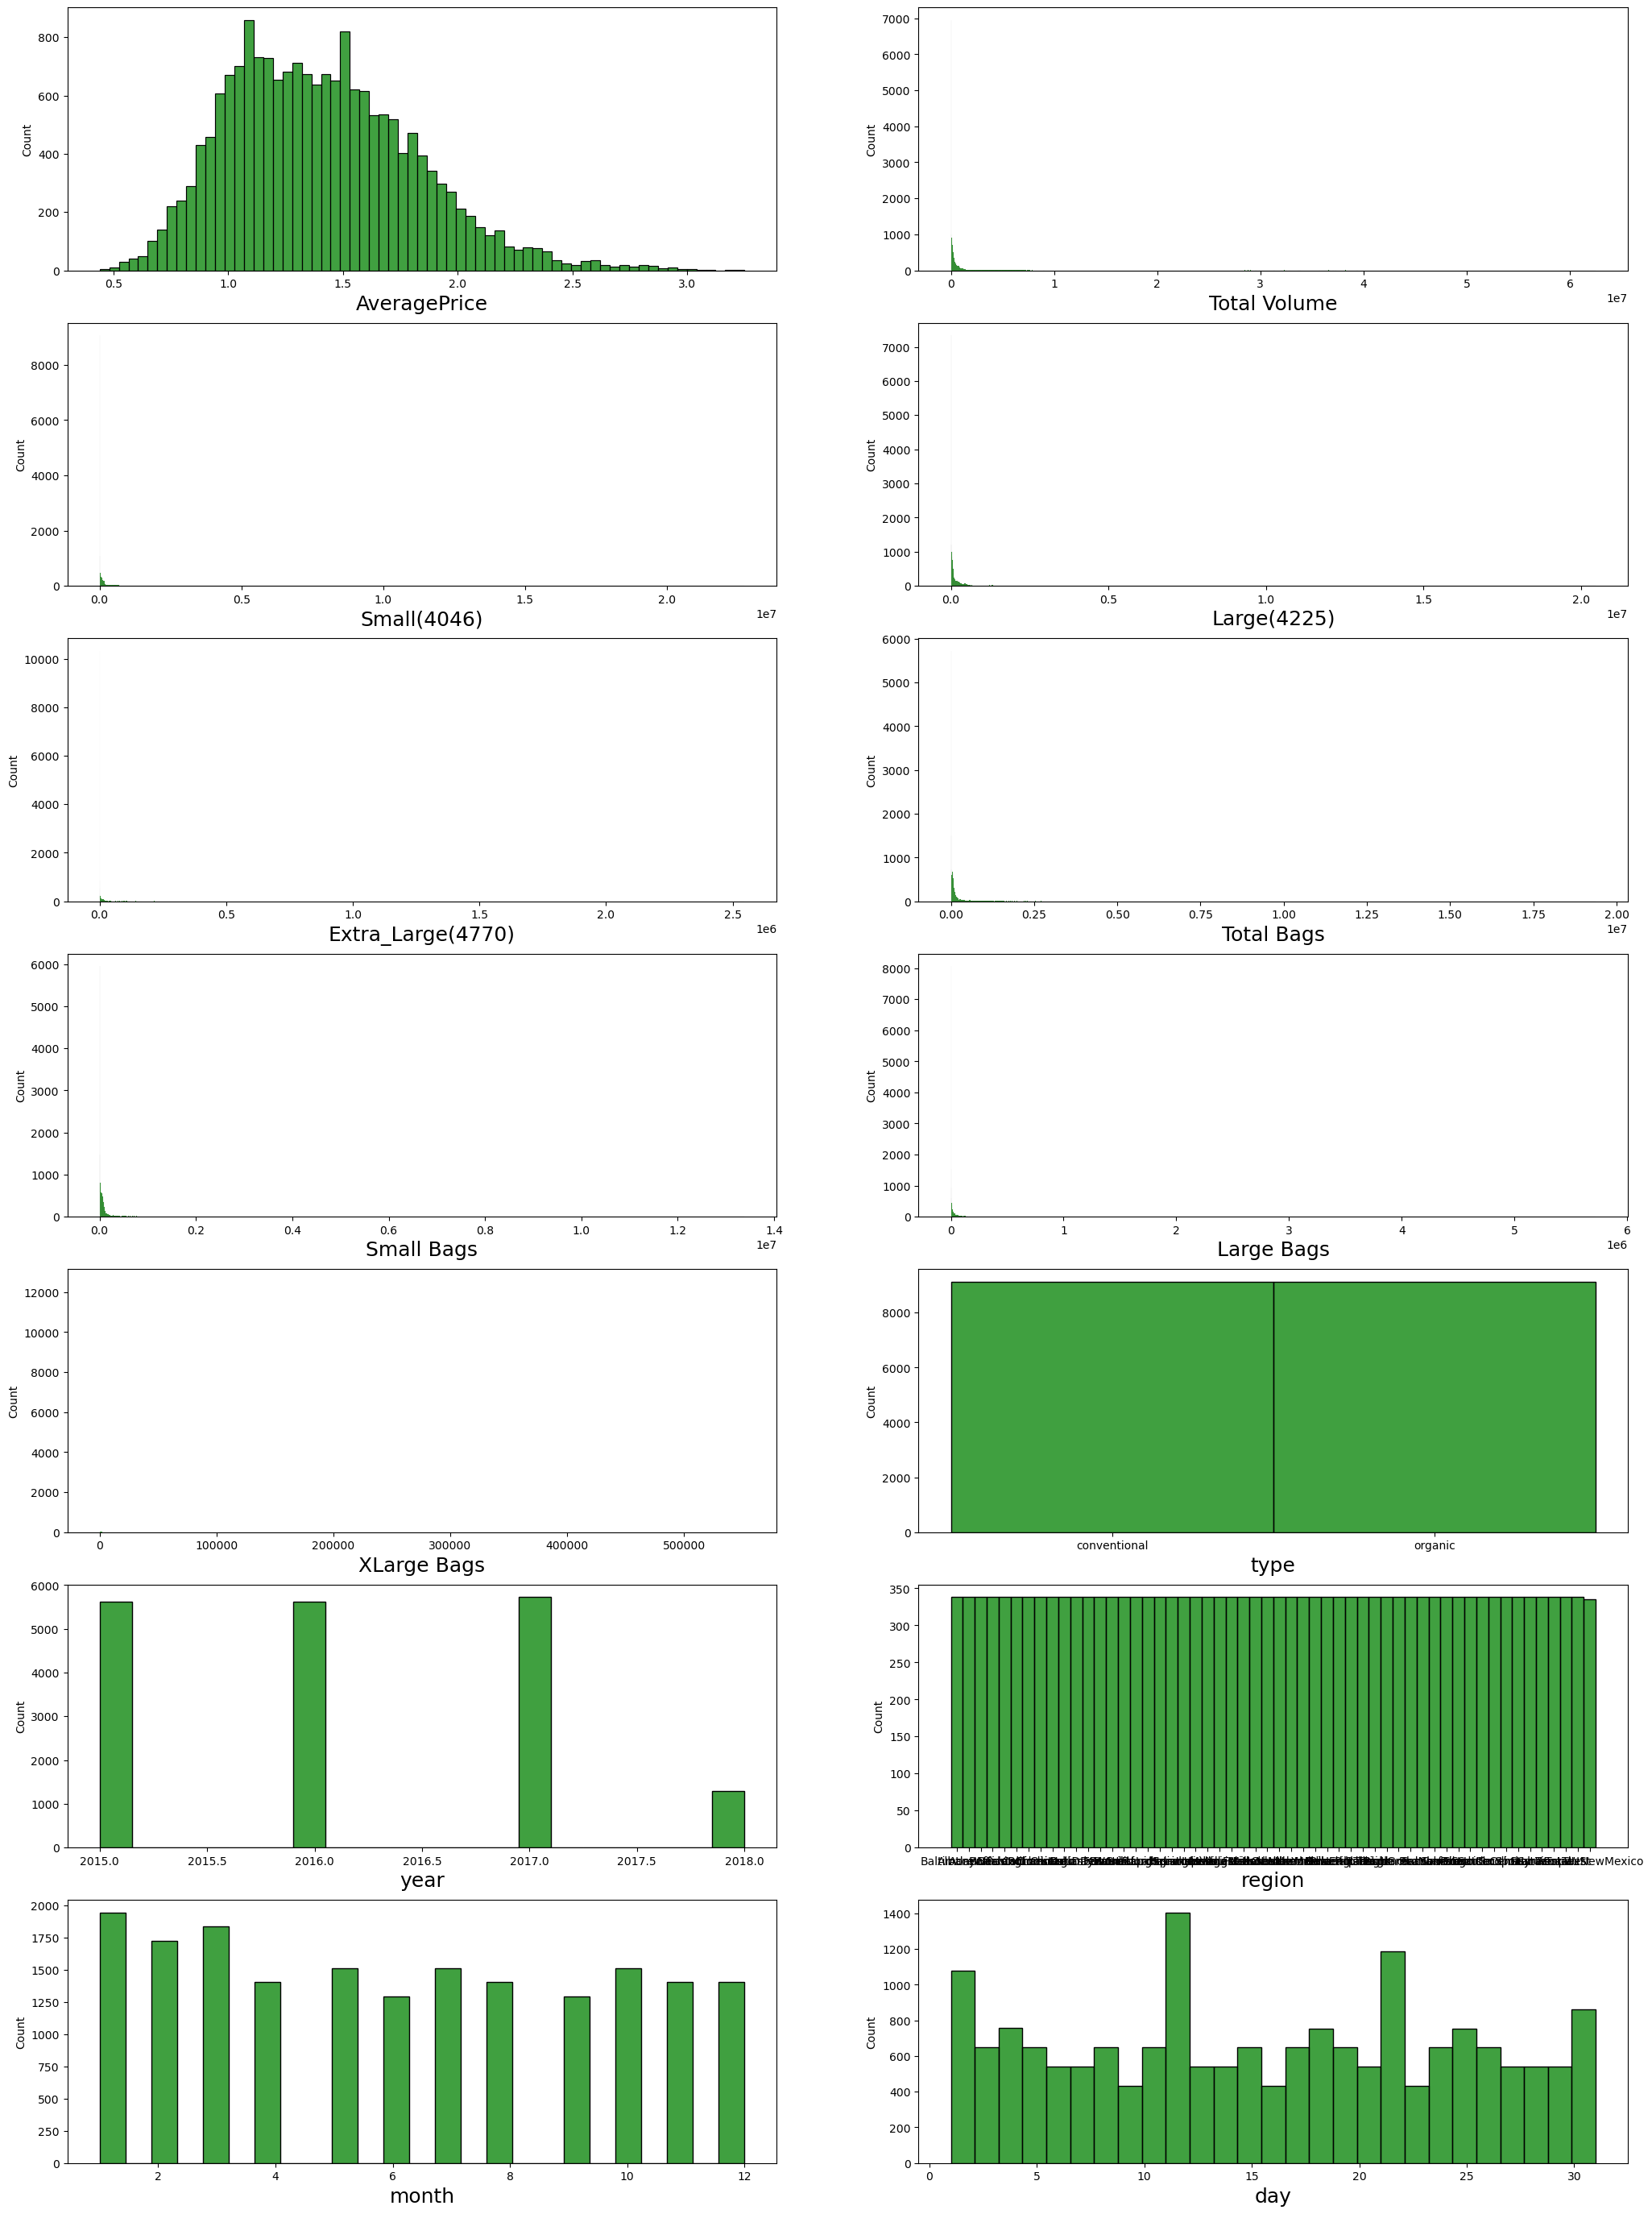

In [18]:
#Getting a graphical view of value counts for each column
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=14:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'green')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.show()

In [19]:
#Checking for null or missing values in the dataset
df.isnull().sum()# no null values

AveragePrice         0
Total Volume         0
Small(4046)          0
Large(4225)          0
Extra_Large(4770)    0
Total Bags           0
Small Bags           0
Large Bags           0
XLarge Bags          0
type                 0
year                 0
region               0
month                0
day                  0
dtype: int64

<Axes: >

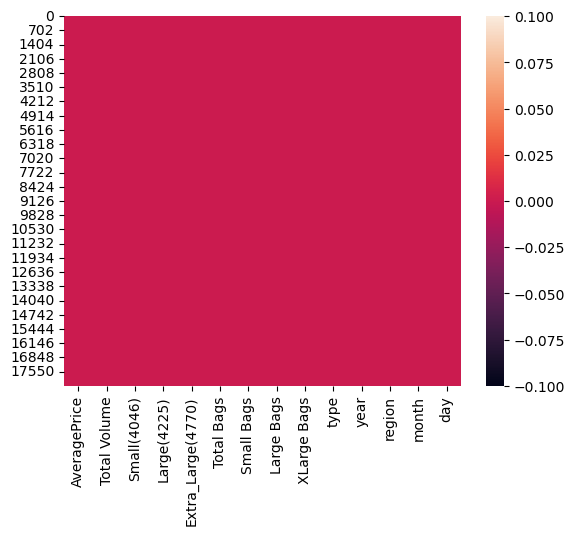

In [20]:
#visualize null using a heatmap
sns.heatmap(df.isnull())#visual confirmation of no null values 

In [21]:
#Statistical summary of numerical columns
df.describe()


AveragePrice  Total Volume   Small(4046)   Large(4225)  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

       Extra_Large(4770)    Total Bags    Small Bags    Large Bags  \
count       1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean        2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04   
std         1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   
min         0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%         0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02   
50%         1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03   
75%         6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04   
max         2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06   

         XLarge Bags          year         month           day  
count   18249.000000  18249.000000  18249.000000  18249.000000  
mean     3106.426507   2016.147899      6.177215     15.662612  
std     17692.894652      0.939938      3.534130      8.776281  
min         0.000000   2015.000000      1.000000      1.000000  
25%         0.000000   2015.000000      3.000000      8.000000  
50%         0.000000   2016.000000      6.000000     16.000000  
75%       132.500000   2017.000000      9.000000     23.000000  
max    551693.650000   2018.000000     12.000000     31.000000

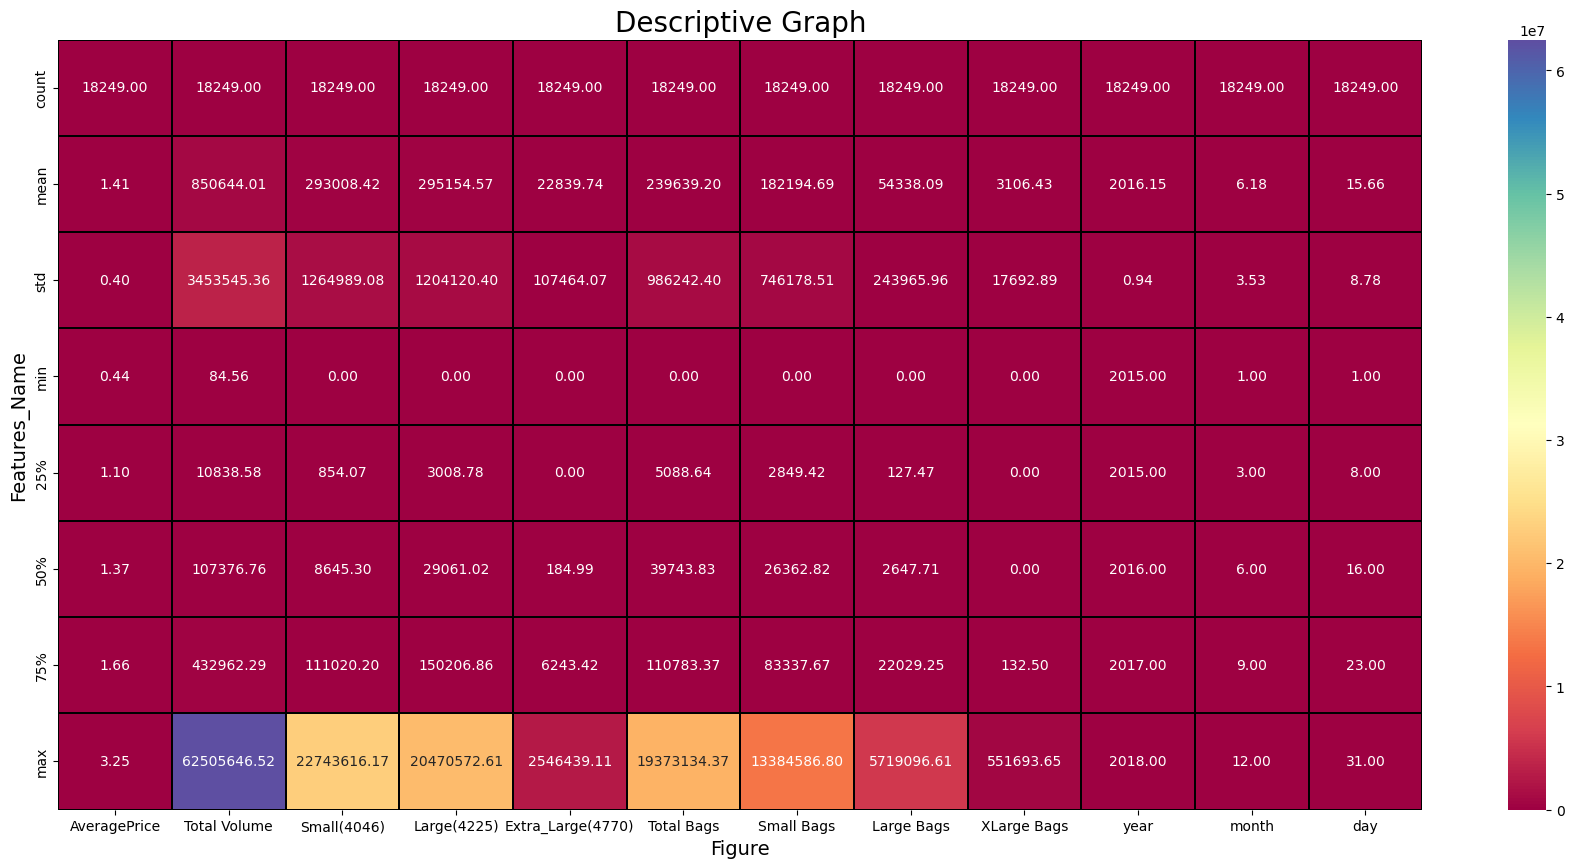

In [22]:
#Graphical view of statistical data description
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('Figure',fontsize=14)
plt.ylabel('Features_Name',fontsize=14)
plt.title('Descriptive Graph',fontsize=20)
plt.show()

In [ ]:
Interpretation of the Statistical summary of dataset

General view
#from the statistical description above the count of all columns are similar therefore no missing data values
#mean value of all columns is greater than the median(second percentile)therefore the data is skewed to the right.This will be dealt with later
#In all columns there are huge differences between the third percentile and max values which signify the existance of outliers in the data. 

Column specific statistical view

AveragePrice: The average price of avocados is approximately 1.41, with a minimum of 0.44 and a maximum of 3.25.

Total Volume: The total volume of avocados ranges from a minimum of 84.56 units to a maximum of 62,505,647 units, with an average volume of approximately 850,644 units.

Small(4046), Large(4225), and Extra_Large(4770): These columns show the volumes of avocados according to size sizes. The minimum values is 0 and maximum values run into millions. The mean volumes for each category are approximately 293,008 units(second highest), 295,155 units(highest), and 22,840 units(lowest), respectively.

Total Bags: The total number of bags used for packaging avocados ranges from 0 to approximately 19,373,130, with an average of about 239,639 bags.

Small Bags, Large Bags, and XLarge Bags: These columns represent the number of bags of different sizes used for packaging. They vary from a  minimum value of 0 and maximum values in the millions. On average, there are approximately 182,195 small bags, 54,338 large bags, and 3,106 extra-large bags.

Year: The data ranges from 2015 to 2018.

Month: The months range from 1 to 12, showing data collected throughout the course year. The most common month appears to be December (12), based on the 75th percentile.

Day: The day of the month ranges from 1 to 31, confirming that data was collected daily as in the project description. December 31st (31) is the maximum value.



In [23]:
#Summary of columns with categorical data
df.describe(include='object')

type  region
count          18249   18249
unique             2      54
top     conventional  Albany
freq            9126     338

In [ ]:
#Similar to numerical data records,there are 18249 records under the type label.There are two unique categories under type.The top and most frequent one being conventional.
#In the same way,there are 54 unique regions in the region column with Albany being the top and most frequent.
#the above provide a view  of the most common type of avocados and the dorminant market.

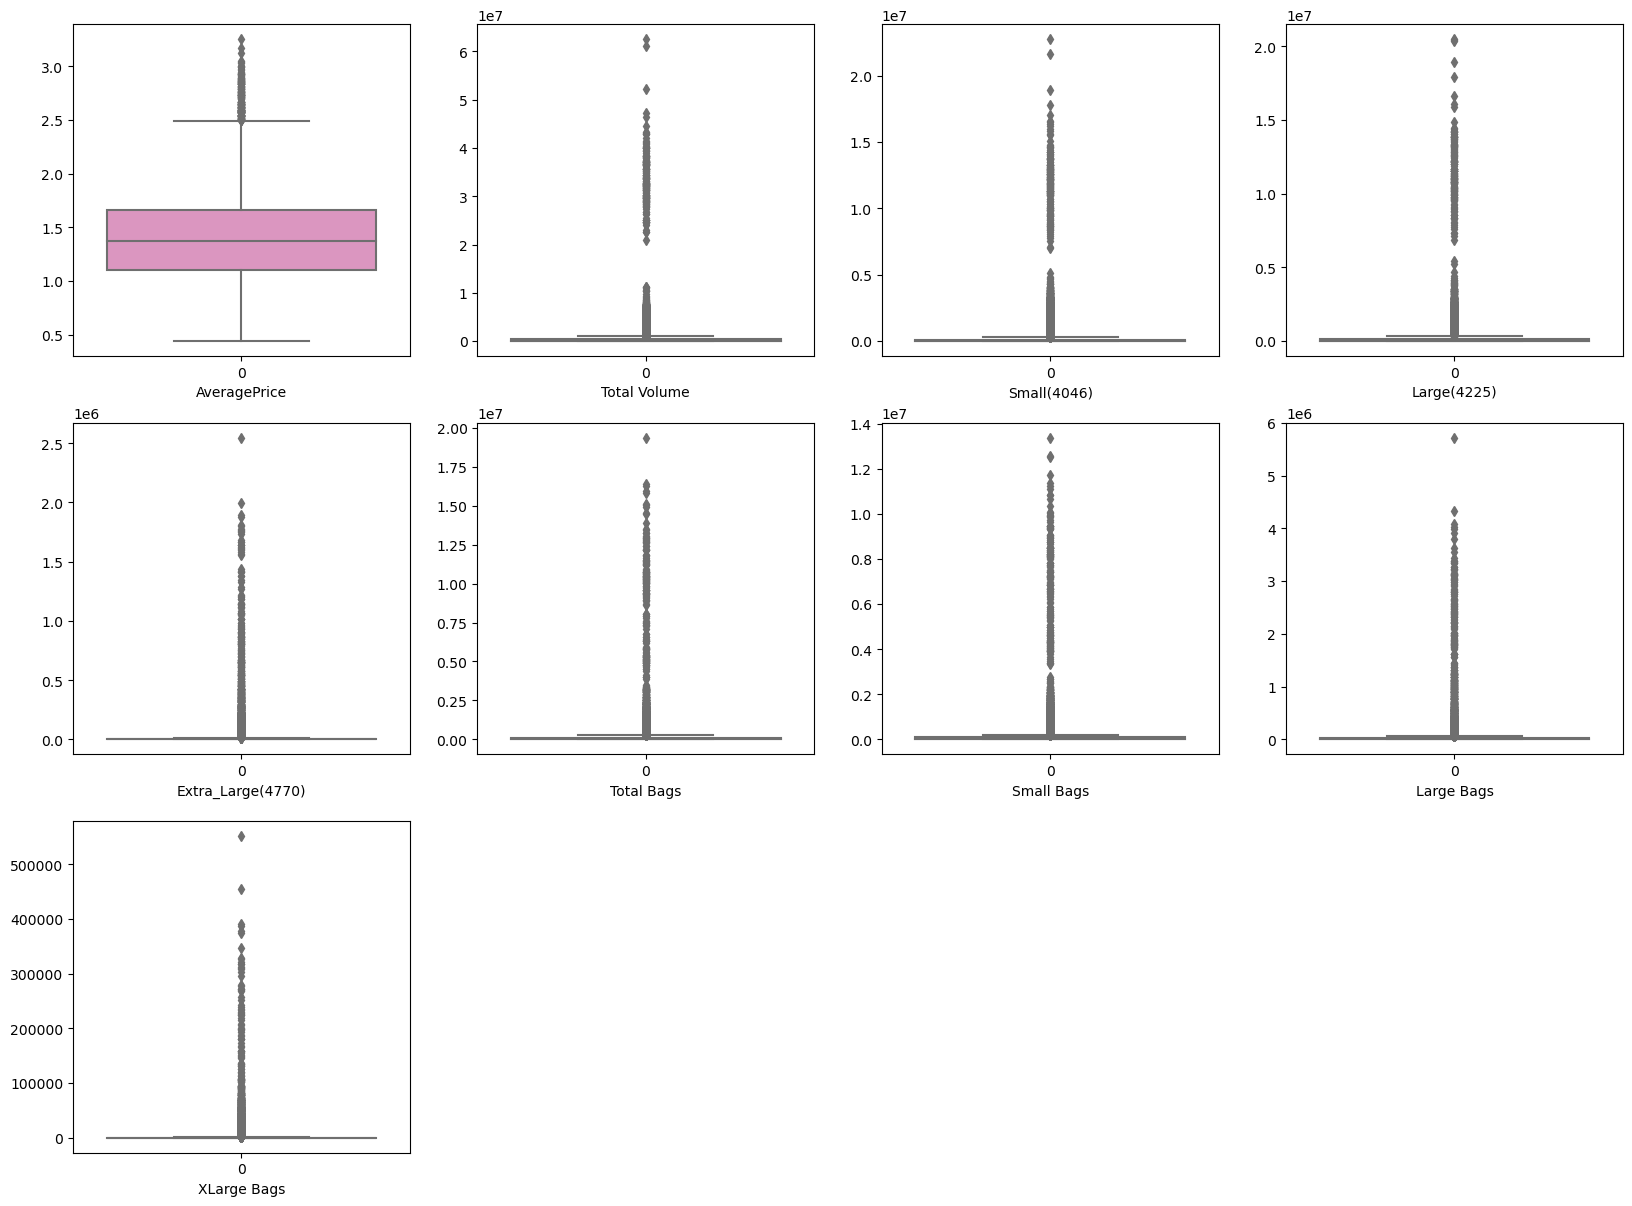

In [25]:
#Let's check data distribution and outliers using boxplot
#please note that this is for numerical columns only and its evident that there are outliers in all columns as mention in the statistial summary
#I only considered only numerical columns
#Outliers will be dealt with later
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=9:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette ="Set2_r")
        plt.xlabel(i)
        
    p+=1
    
plt.show()

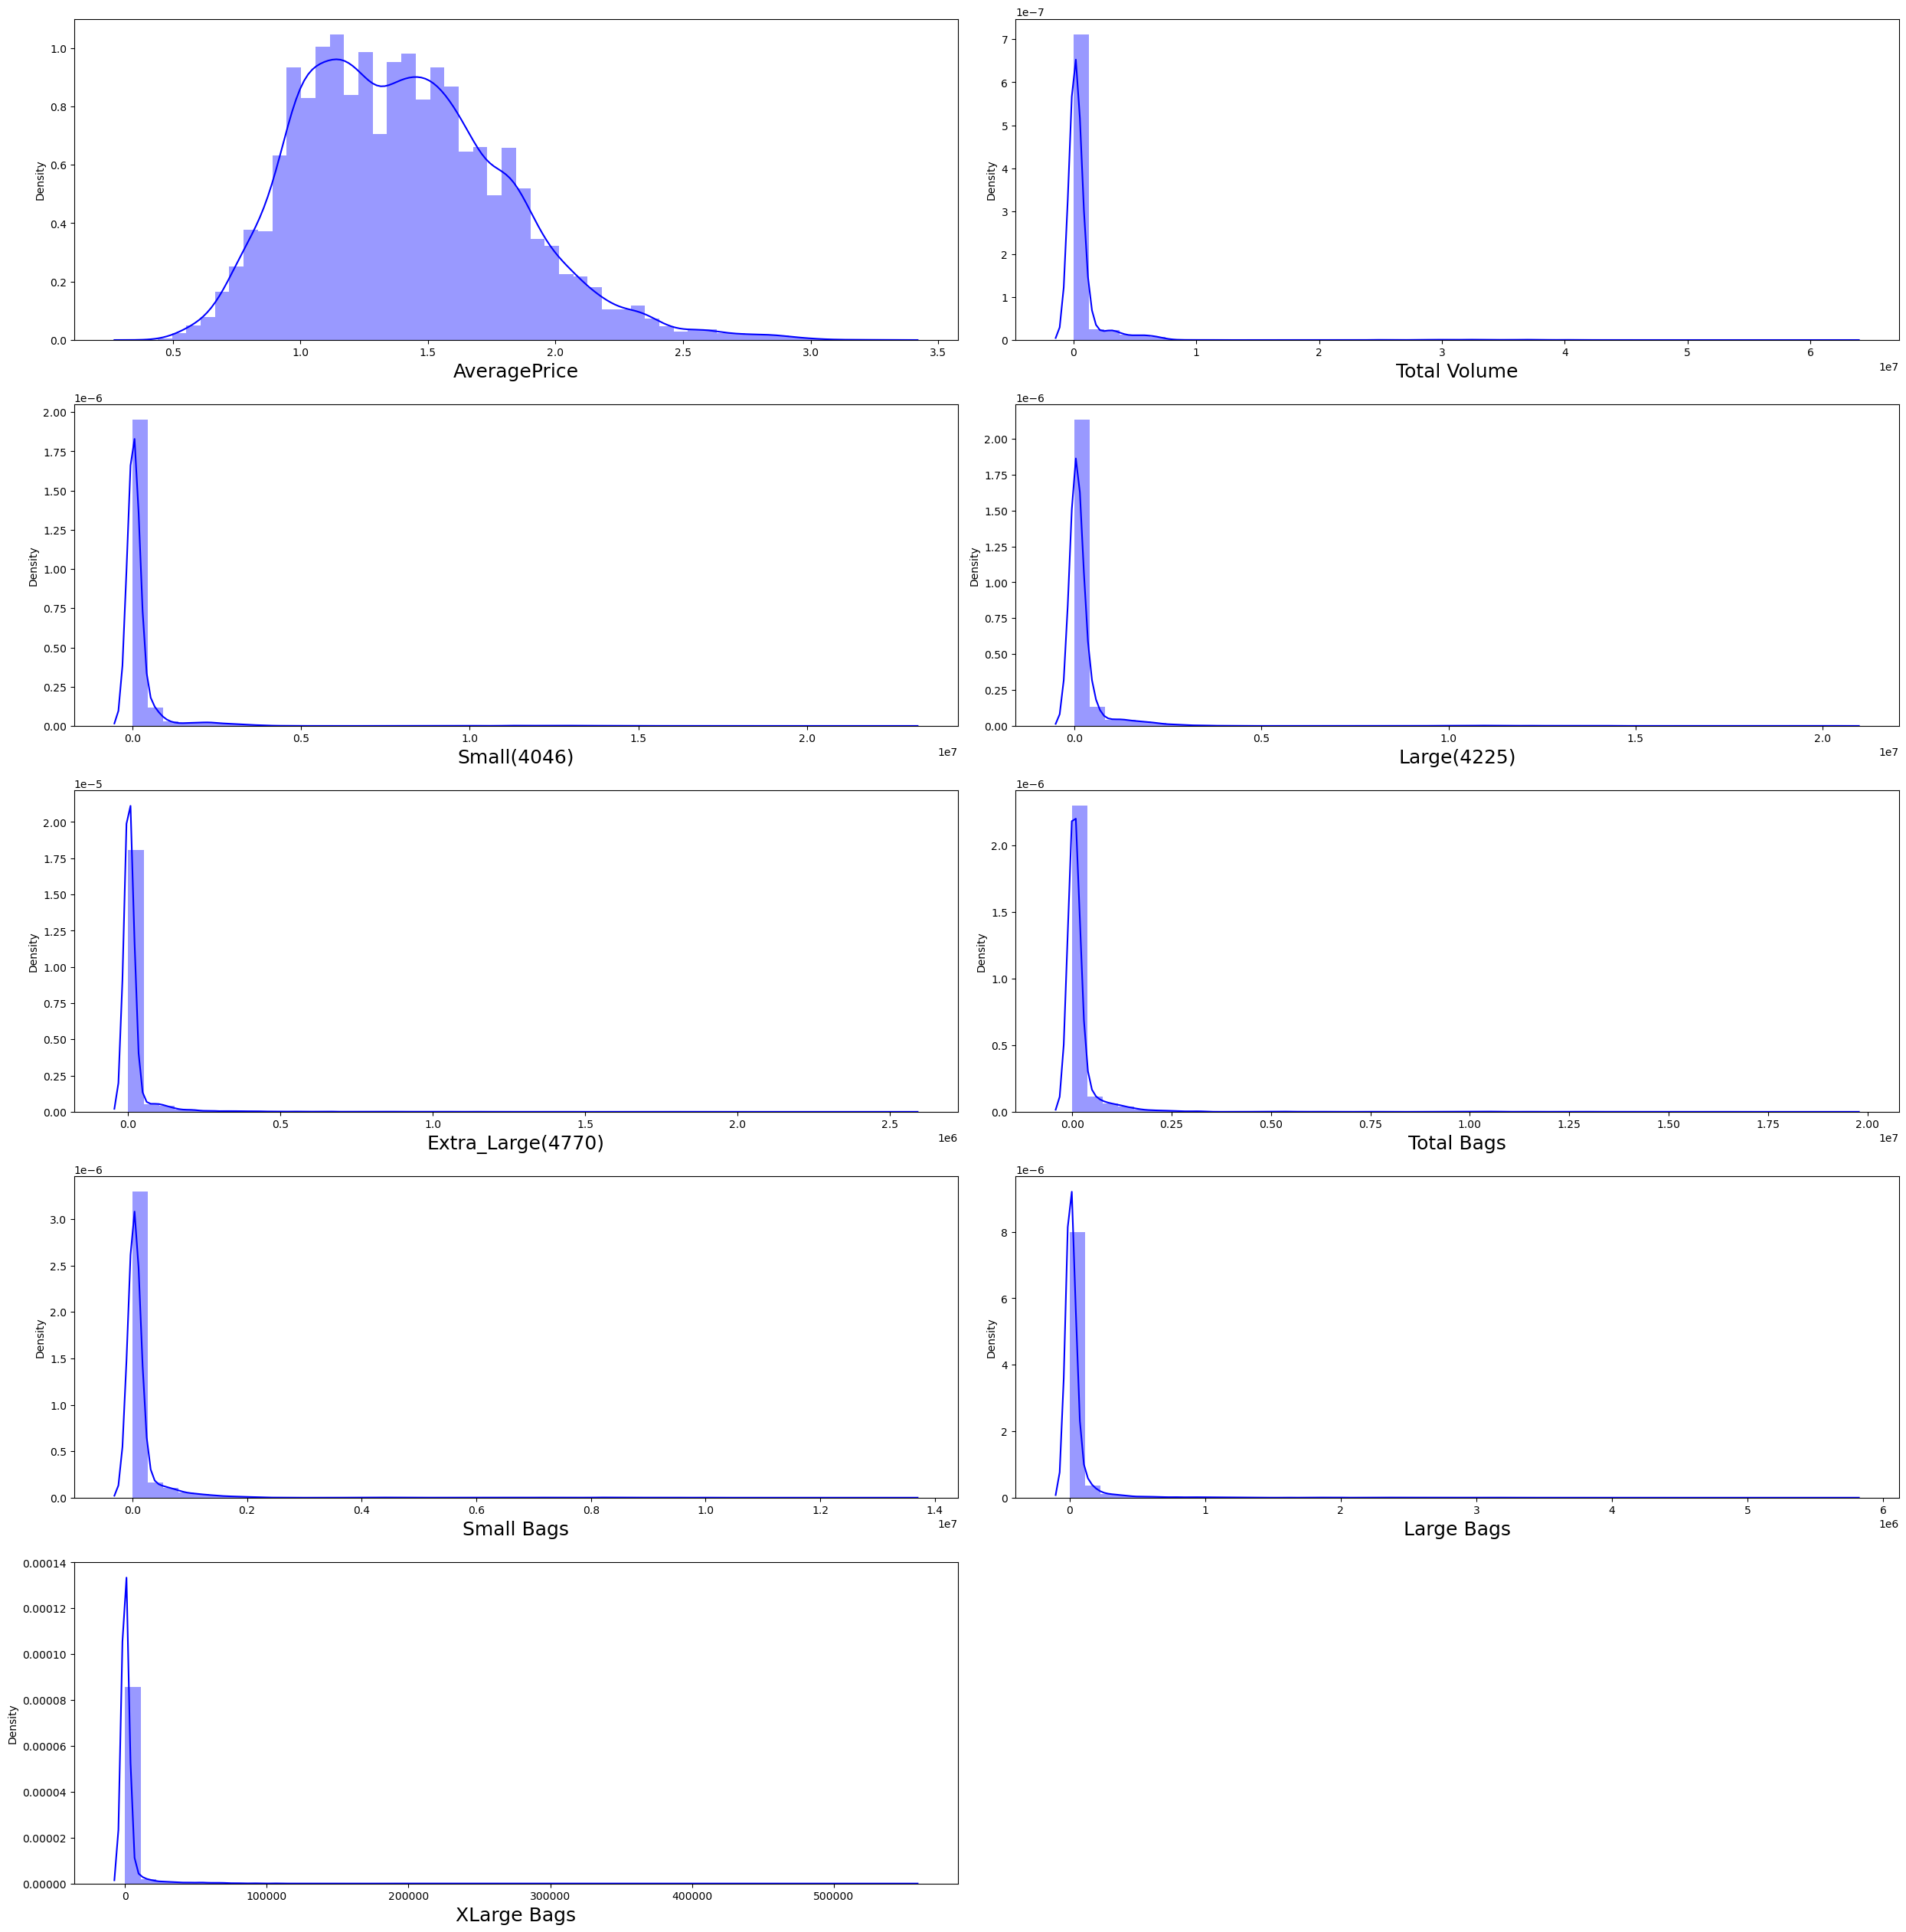

In [26]:
#Checking the distribution of data using distribution plot
#This is for numerical columns only and  excluding day,month,year ,region and type hence out of the 14 columns I considered only 9 in visualization below
#I see a normal distribution in the Average Price signified by the bell shape of the graph
#the rest of the columns show skeweness as highlighted earlier
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=9:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()

<bound method IndexOpsMixin.value_counts of 0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object>


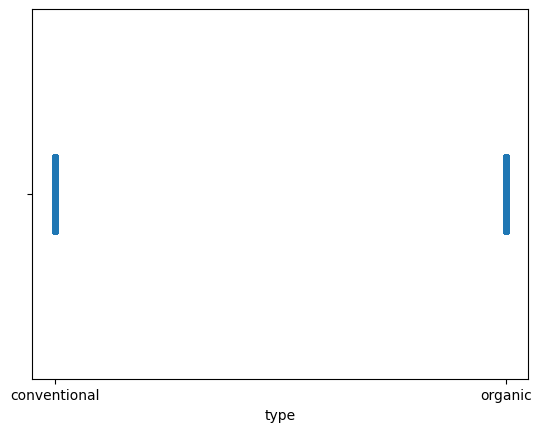

In [27]:
#Data Visualizaton -Univariate Analysis

#Visualize the avocado type categories.
ax=sns.stripplot(x='type',data=df)
print(df['type'].value_counts)


<bound method IndexOpsMixin.value_counts of 0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object>


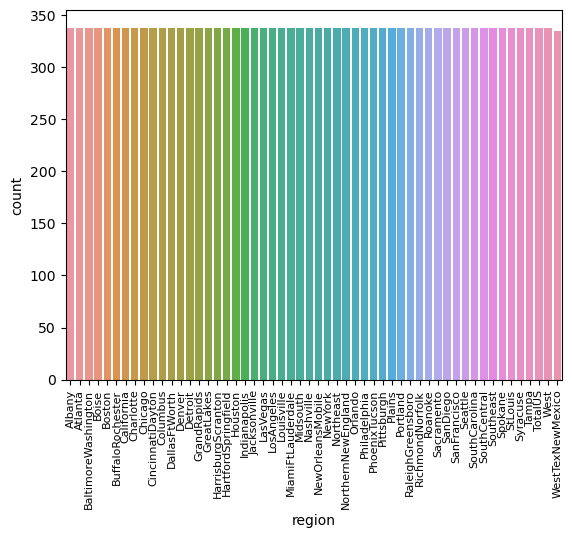

In [28]:
ax=sns.countplot(x='region',data=df)
plt.xticks(rotation=90, fontsize=8)
print(df['region'].value_counts)

In [ ]:
Univariate analysis as shown above has been primarily done on categorical columns

As reflected in the first graph,the "type" column has  conventional and organic.Their frequency is almost similar.

In the second graph, we look at the "region" column.
Each region has similar frequency with the exception of WestTexNewMexico, which is slightly lower.

In [ ]:
Bivariate Analysis

In this analysis we consider variables in pairs.It is therefore prudent to split the columns into category and numerical.
This is because certain graphs/visualisations are only appropriate for certain data types.

In [29]:
#Split between Categorical and Numerical columns

categorical = ['type', 'year', 'region','month','day']
numerical = ['AveragePrice', 'Total Volume', 'Small(4046)','Large(4225)','Extra_Large(4770)','Total Bags','Small Bags','Large Bags','XLarge Bags' ]

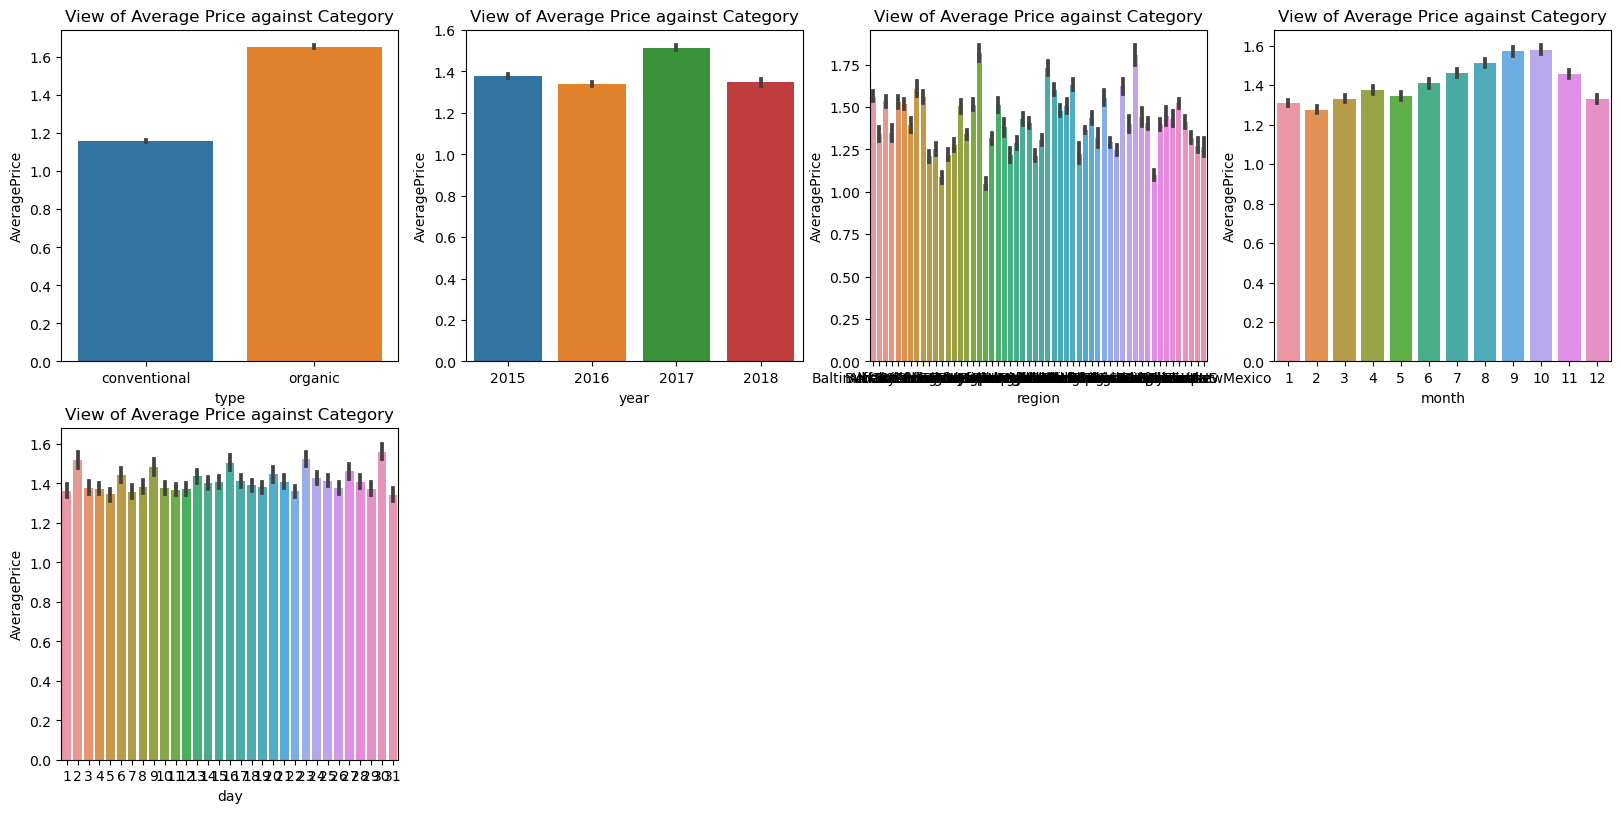

In [30]:
#Bivariate analysis of target variable versus categorical columns

plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for i in categorical:
    if p<=6:
        plt.subplot(5,4,p)
        sns.barplot(x=df[i],y='AveragePrice',data=df)
    plt.title("View of Average Price against Category")
      
    p+= 1
plt.show()

In [ ]:
The data reveals that the price of organic avocados is generally higher than that of conventional avocados.

Year 2017 recorded the highest average price over the four year period

The 9th and 10th have the highest average prices.



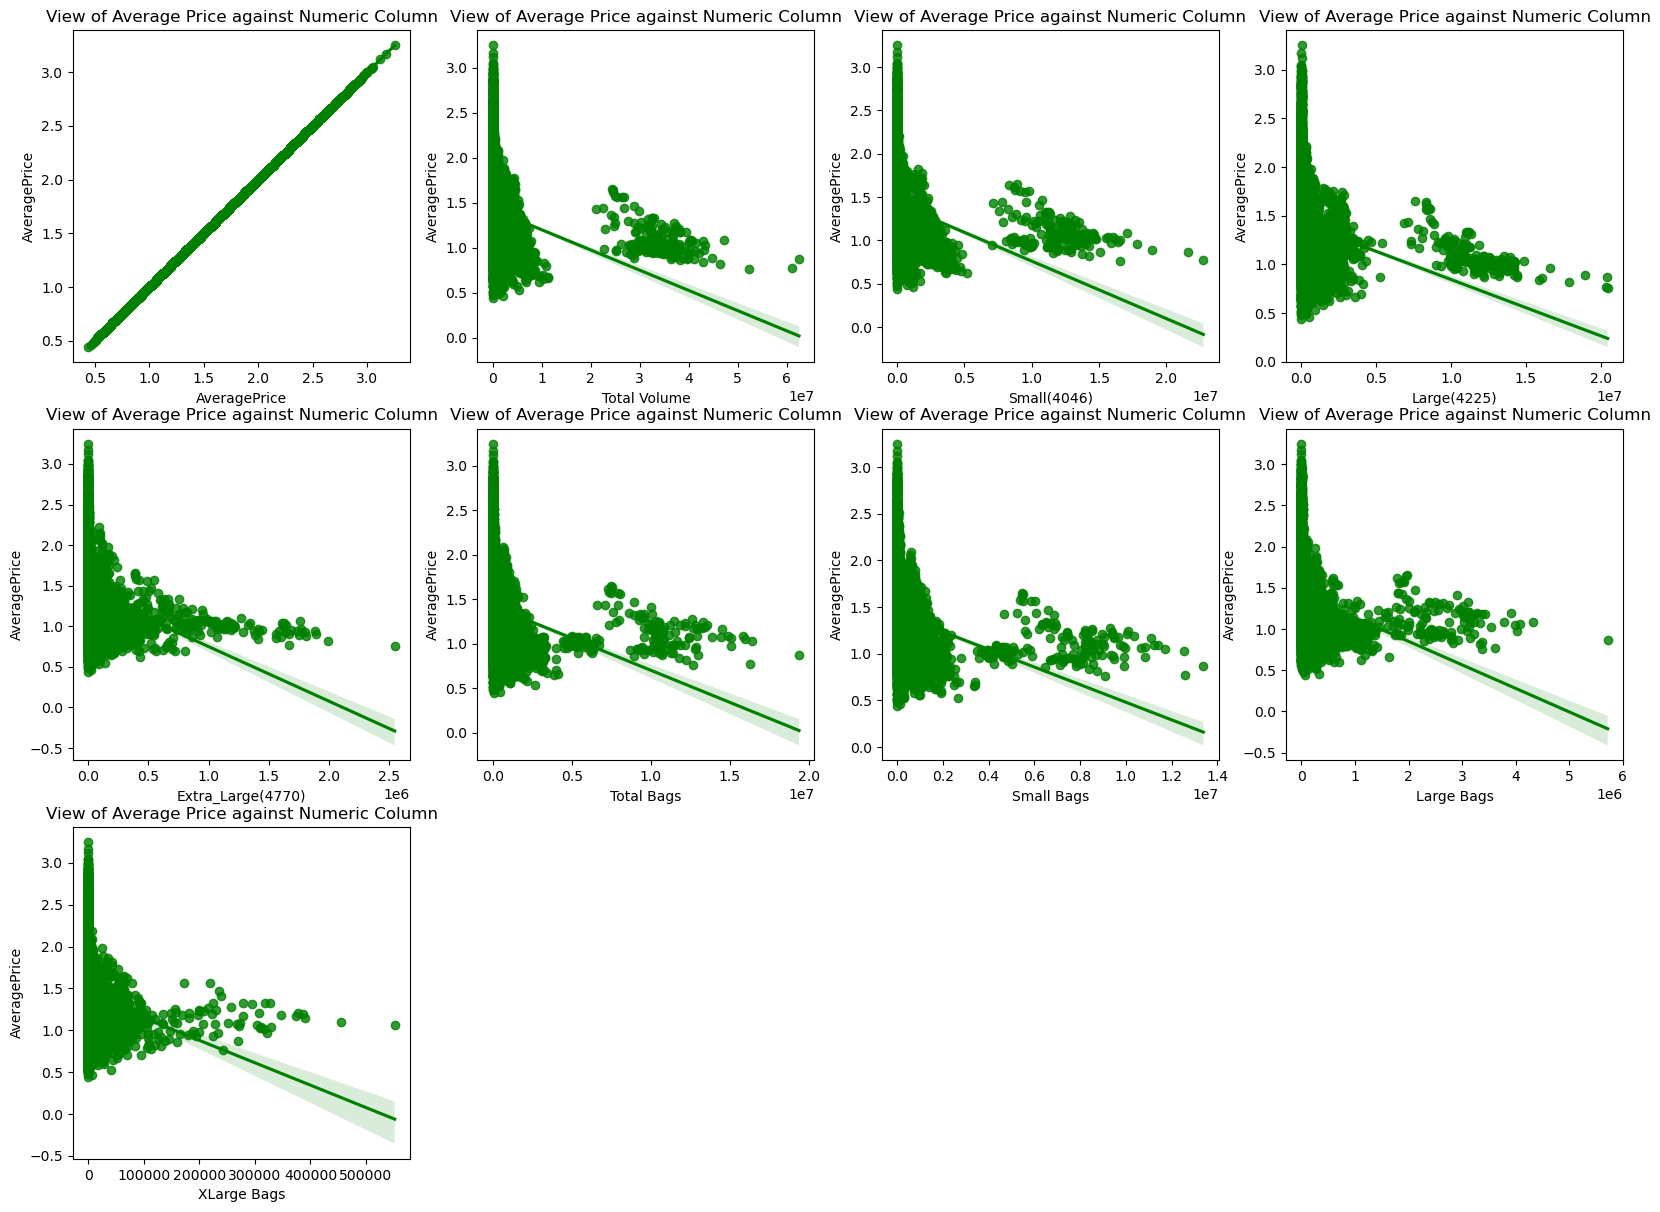

In [31]:
#Bivariate analysis of Average price versus numerical columns

plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for i in numerical:
    if p<=12:
        plt.subplot(5,4,p)
        sns.regplot(x=df[i],y='AveragePrice',data=df,color='green')
        plt.title("View of Average Price against Numeric Column")
      
    p+= 1
plt.show()

In [ ]:
#the above charts shows that there is a negative relationship between the avarege price and quantity.As the quantity of avocados increase,its price decreases

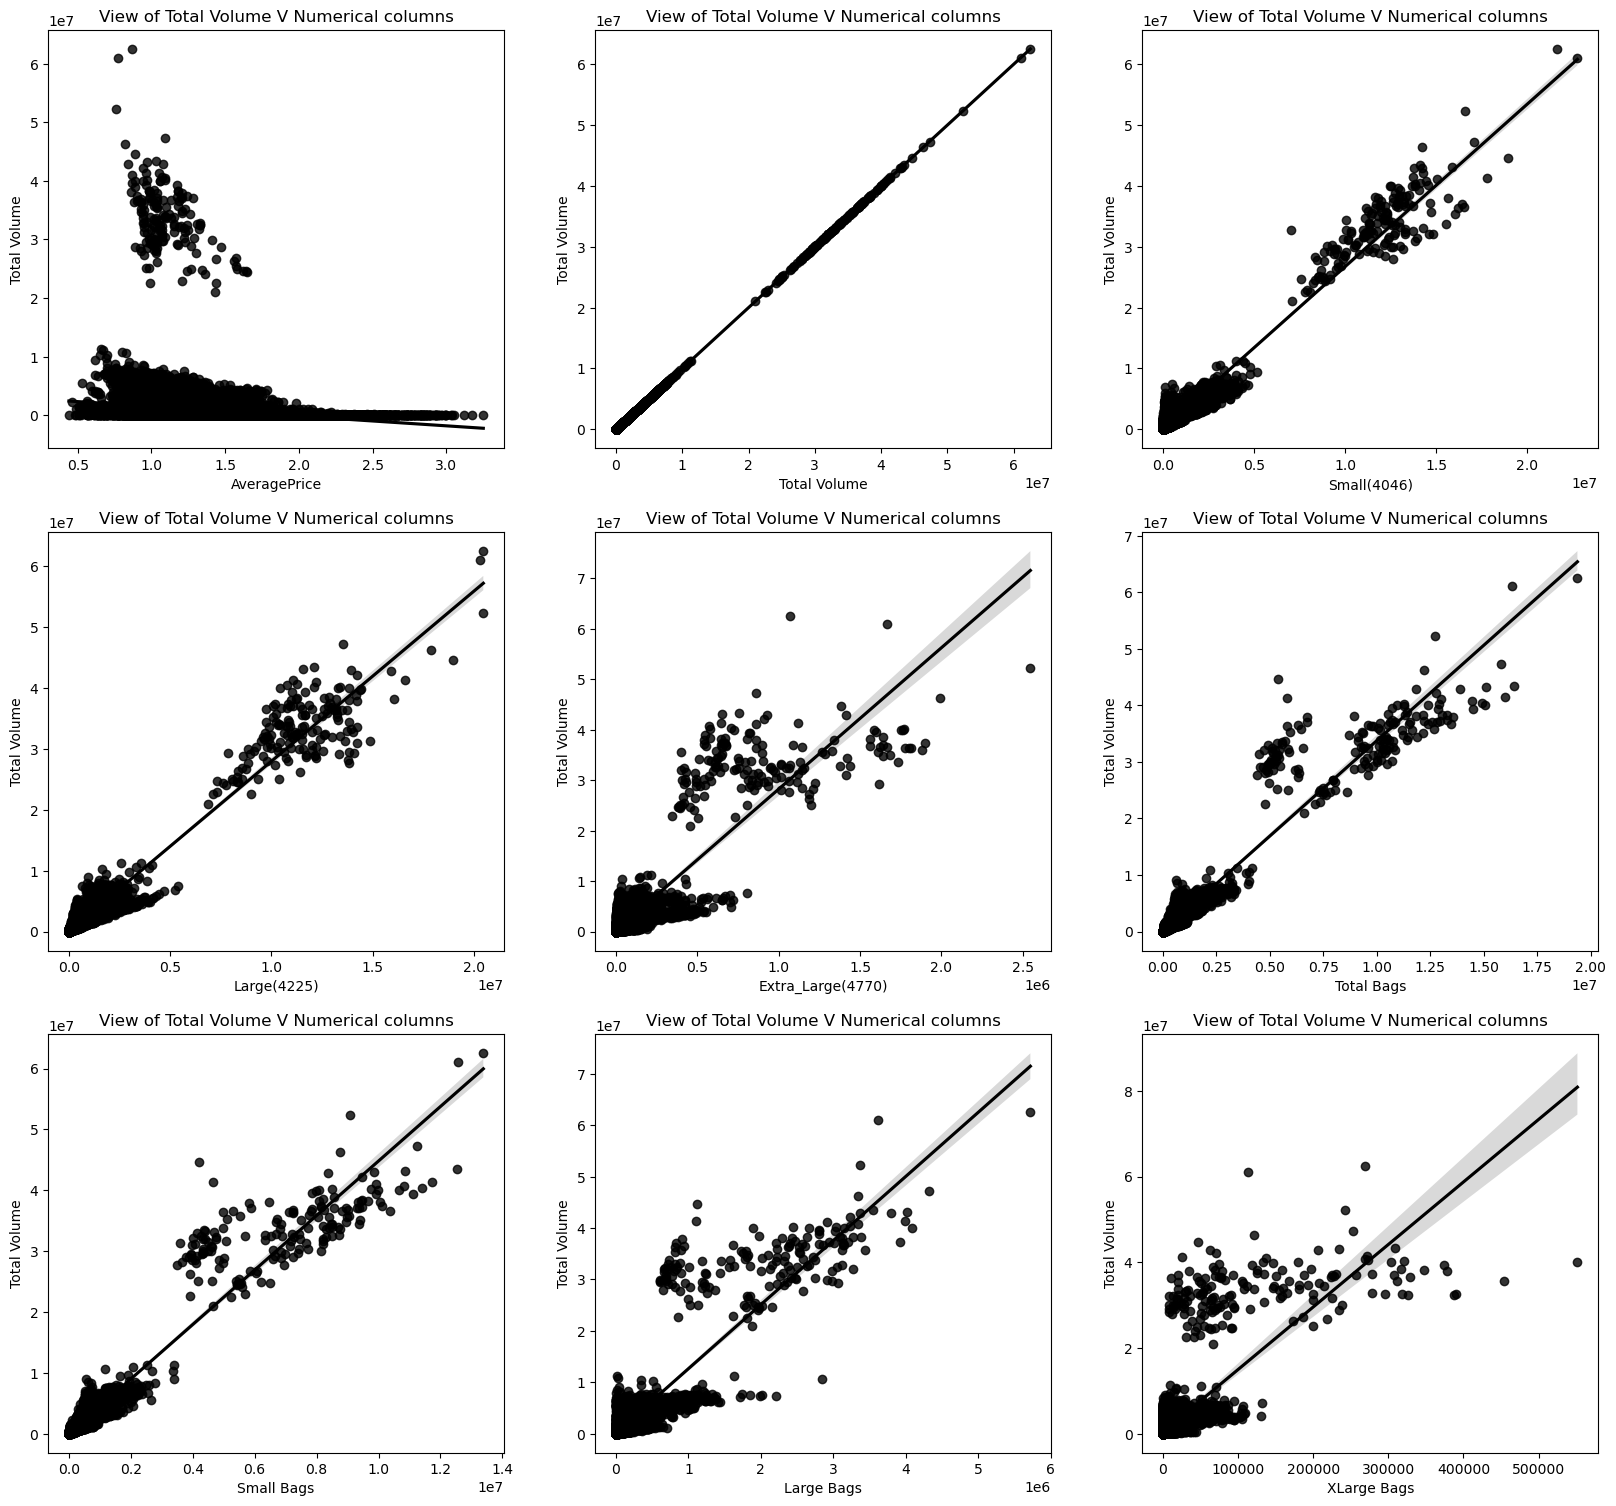

In [32]:
#Total Volume versus numerical columns
plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for i in numerical:
    if p<=12:
        plt.subplot(4,3,p)
        sns.regplot(x=df[i],y='Total Volume',data=df,color='black')
        plt.title("View of Total Volume V Numerical columns")
      
    p+= 1
plt.show()

In [ ]:
#there is a positive relationship between the total volume and number of bags required.An increase in avocados is matched by an increase in number bags for carrying capacity.

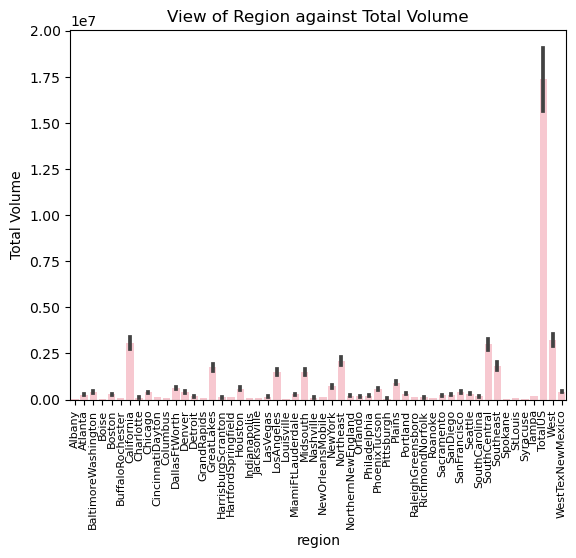

In [33]:
plt.title("View of Region against Total Volume")
plt.xticks(rotation=90, fontsize=8)
sns.barplot(x='region',y='Total Volume',data=df,color='pink')
plt.show()

In [ ]:
#there is a high supply of avocados in the US as a hole.This tends to lower the price.

<Axes: title={'center': 'Avocado Type V Average Price'}, xlabel='type', ylabel='AveragePrice'>

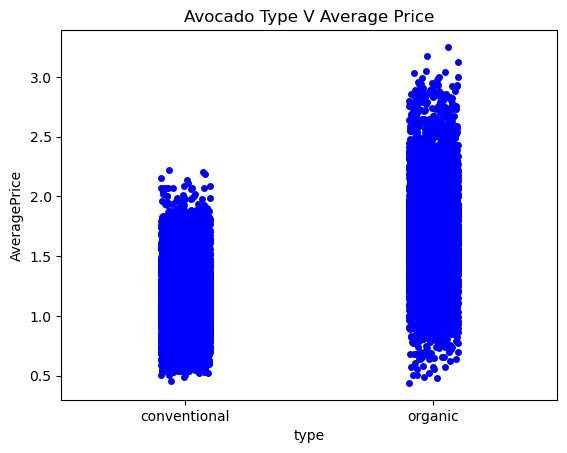

In [34]:
plt.title("Avocado Type V Average Price")
sns.stripplot(x='type',y='AveragePrice',data=df,color='blue')

In [ ]:
#Organic avocados are more expensive than conventional ones.This could be because the former are Capital and labour intensive to produce.Organic avocados 
are generally not genetically modified hence prefered by those who value healthy eating and are ready to pay more for them.

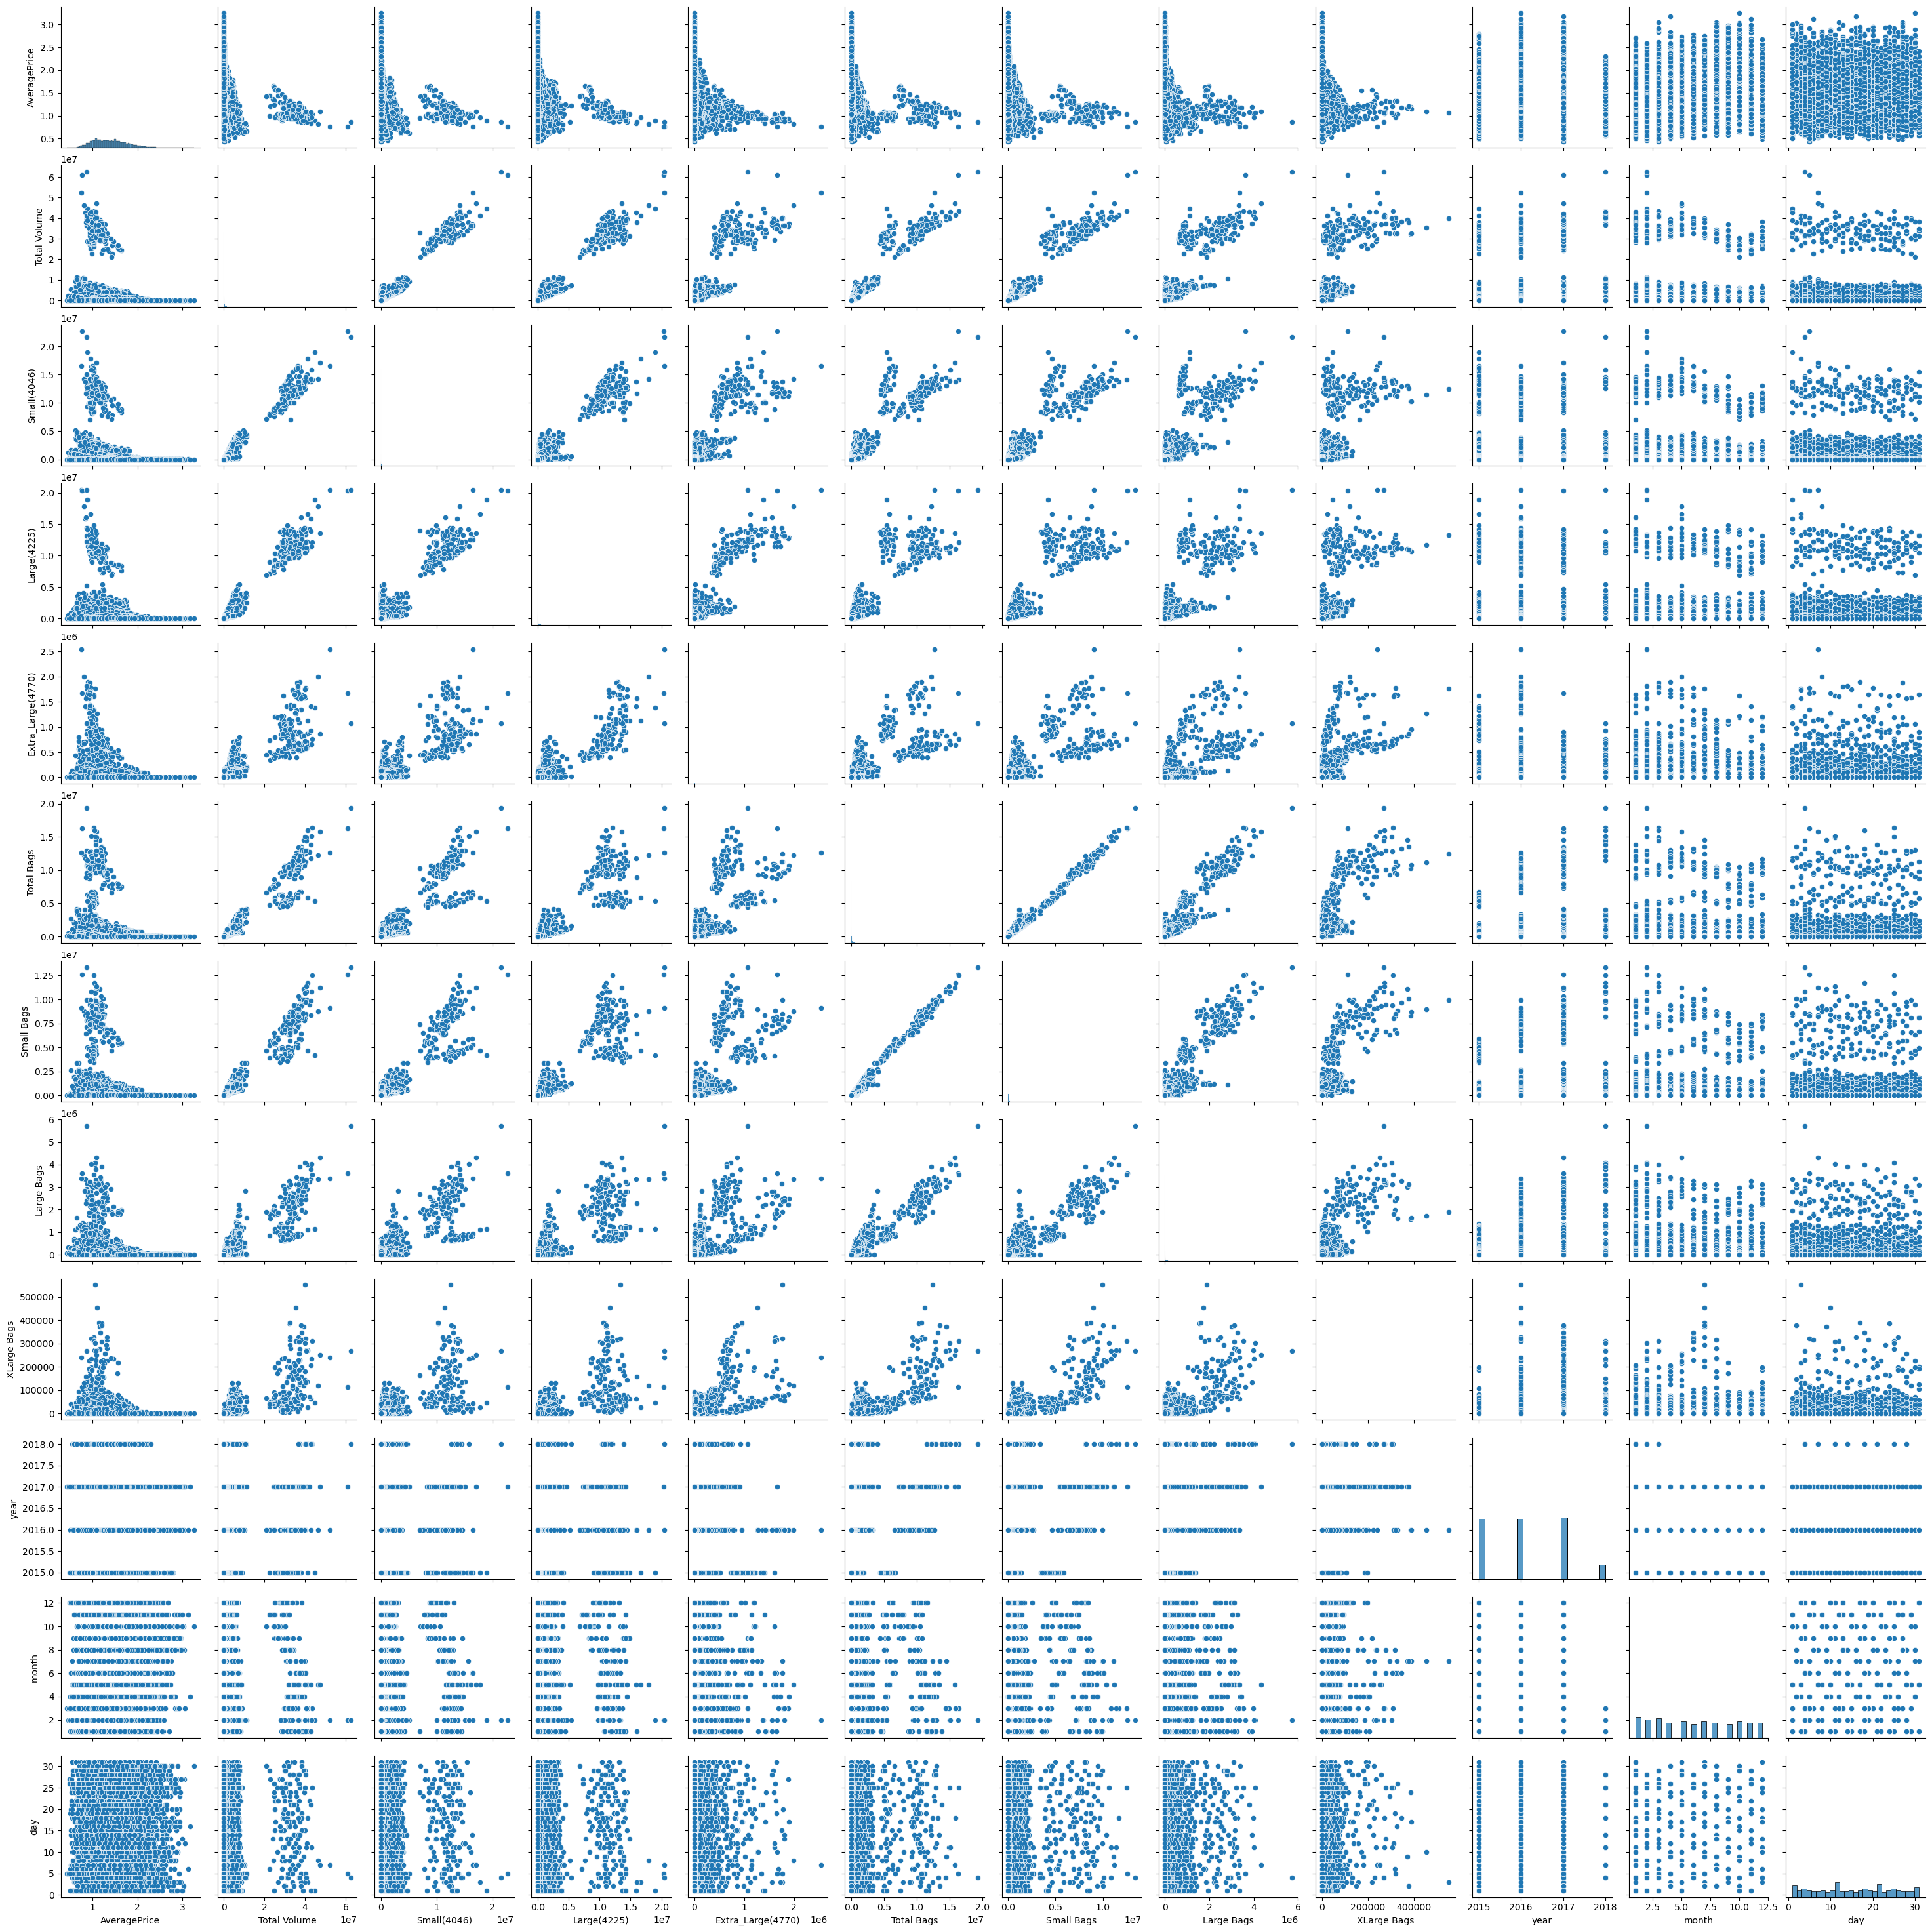

In [35]:
#Multivariate analysis
sns.pairplot(data =df,palette="Dark2")
plt.show()

<Axes: title={'center': 'Avocado Type by year and Average Price'}, xlabel='type', ylabel='AveragePrice'>

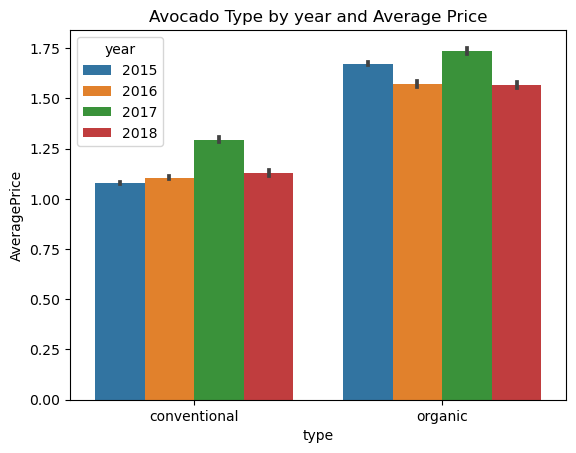

In [36]:
plt.title("Avocado Type by year and Average Price")
sns.barplot(x='type',y='AveragePrice',hue='year',data=df)

<Axes: title={'center': 'Avocado Type by year and Total Volume'}, xlabel='type', ylabel='Total Volume'>

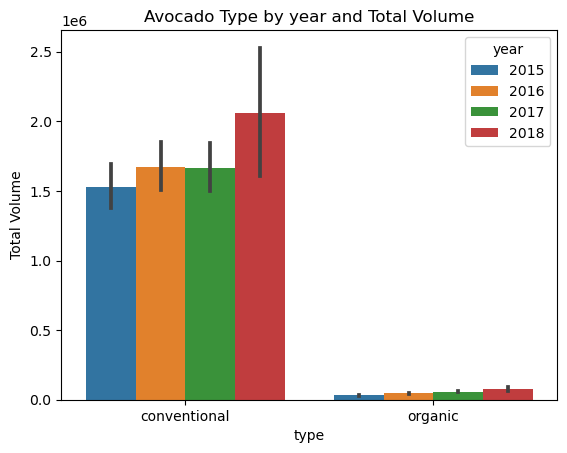

In [37]:
plt.title("Avocado Type by year and Total Volume")
sns.barplot(x='type',y='Total Volume',hue='year',data=df)

In [ ]:
In multivariate analysis above we can clearly see that organic avocados ahave the highest average price but the lowest volume.
This can also be explained by the law of demand in econnomics which states tha a rational consumer,all things being equal is prepared
to buy more at a less price

In [38]:
#Transforming categorical into numerical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['region'] = le.fit_transform(df['region'])

df['type'] = le.fit_transform(df['type'])
df.head(10)

AveragePrice  Total Volume  Small(4046)  Large(4225)  Extra_Large(4770)  \
0          1.33      64236.62      1036.74     54454.85              48.16   
1          1.35      54876.98       674.28     44638.81              58.33   
2          0.93     118220.22       794.70    109149.67             130.50   
3          1.08      78992.15      1132.00     71976.41              72.58   
4          1.28      51039.60       941.48     43838.39              75.78   
5          1.26      55979.78      1184.27     48067.99              43.61   
6          0.99      83453.76      1368.92     73672.72              93.26   
7          0.98     109428.33       703.75    101815.36              80.00   
8          1.02      99811.42      1022.15     87315.57              85.34   
9          1.07      74338.76       842.40     64757.44             113.00   

   Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  month  \
0     8696.87     8603.62       93.25          0.0     0  2015       0     12   
1     9505.56     9408.07       97.49          0.0     0  2015       0     12   
2     8145.35     8042.21      103.14          0.0     0  2015       0     12   
3     5811.16     5677.40      133.76          0.0     0  2015       0     12   
4     6183.95     5986.26      197.69          0.0     0  2015       0     11   
5     6683.91     6556.47      127.44          0.0     0  2015       0     11   
6     8318.86     8196.81      122.05          0.0     0  2015       0     11   
7     6829.22     6266.85      562.37          0.0     0  2015       0     11   
8    11388.36    11104.53      283.83          0.0     0  2015       0     11   
9     8625.92     8061.47      564.45          0.0     0  2015       0     10   

   day  
0   27  
1   20  
2   13  
3    6  
4   29  
5   22  
6   15  
7    8  
8    1  
9   25

In [39]:
#Tabular view of Correlation
cor=df.corr()
cor

AveragePrice  Total Volume  Small(4046)  Large(4225)  \
AveragePrice           1.000000     -0.192752    -0.208317    -0.172928   
Total Volume          -0.192752      1.000000     0.977863     0.974181   
Small(4046)           -0.208317      0.977863     1.000000     0.926110   
Large(4225)           -0.172928      0.974181     0.926110     1.000000   
Extra_Large(4770)     -0.179446      0.872202     0.833389     0.887855   
Total Bags            -0.177088      0.963047     0.920057     0.905787   
Small Bags            -0.174730      0.967238     0.925280     0.916031   
Large Bags            -0.172940      0.880640     0.838645     0.810015   
XLarge Bags           -0.117592      0.747157     0.699377     0.688809   
type                   0.615845     -0.232434    -0.225819    -0.232289   
year                   0.093197      0.017193     0.003353    -0.009559   
region                -0.011716      0.174176     0.192073     0.145726   
month                  0.162409     -0.024689    -0.025803    -0.022108   
day                    0.027386     -0.009747    -0.010159    -0.012393   

                   Extra_Large(4770)  Total Bags  Small Bags  Large Bags  \
AveragePrice               -0.179446   -0.177088   -0.174730   -0.172940   
Total Volume                0.872202    0.963047    0.967238    0.880640   
Small(4046)                 0.833389    0.920057    0.925280    0.838645   
Large(4225)                 0.887855    0.905787    0.916031    0.810015   
Extra_Large(4770)           1.000000    0.792314    0.802733    0.698471   
Total Bags                  0.792314    1.000000    0.994335    0.943009   
Small Bags                  0.802733    0.994335    1.000000    0.902589   
Large Bags                  0.698471    0.943009    0.902589    1.000000   
XLarge Bags                 0.679861    0.804233    0.806845    0.710858   
type                       -0.210027   -0.217788   -0.220535   -0.193177   
year                       -0.036531    0.071552    0.063915    0.087891   
region                      0.095252    0.175256    0.164702    0.198768   
month                      -0.033424   -0.022724   -0.023126   -0.020187   
day                        -0.009009   -0.004988   -0.003870   -0.008352   

                   XLarge Bags      type      year    region     month  \
AveragePrice         -0.117592  0.615845  0.093197 -0.011716  0.162409   
Total Volume          0.747157 -0.232434  0.017193  0.174176 -0.024689   
Small(4046)           0.699377 -0.225819  0.003353  0.192073 -0.025803   
Large(4225)           0.688809 -0.232289 -0.009559  0.145726 -0.022108   
Extra_Large(4770)     0.679861 -0.210027 -0.036531  0.095252 -0.033424   
Total Bags            0.804233 -0.217788  0.071552  0.175256 -0.022724   
Small Bags            0.806845 -0.220535  0.063915  0.164702 -0.023126   
Large Bags            0.710858 -0.193177  0.087891  0.198768 -0.020187   
XLarge Bags           1.000000 -0.175483  0.081033  0.082281 -0.012969   
type                 -0.175483  1.000000 -0.000032 -0.000280 -0.000085   
year                  0.081033 -0.000032  1.000000 -0.000055 -0.177050   
region                0.082281 -0.000280 -0.000055  1.000000 -0.000144   
month                -0.012969 -0.000085 -0.177050 -0.000144  1.000000   
day                   0.000319 -0.000013  0.004475 -0.000021  0.010621   

                        day  
AveragePrice       0.027386  
Total Volume      -0.009747  
Small(4046)       -0.010159  
Large(4225)       -0.012393  
Extra_Large(4770) -0.009009  
Total Bags        -0.004988  
Small Bags        -0.003870  
Large Bags        -0.008352  
XLarge Bags        0.000319  
type              -0.000013  
year               0.004475  
region            -0.000021  
month              0.010621  
day                1.000000

<Axes: >

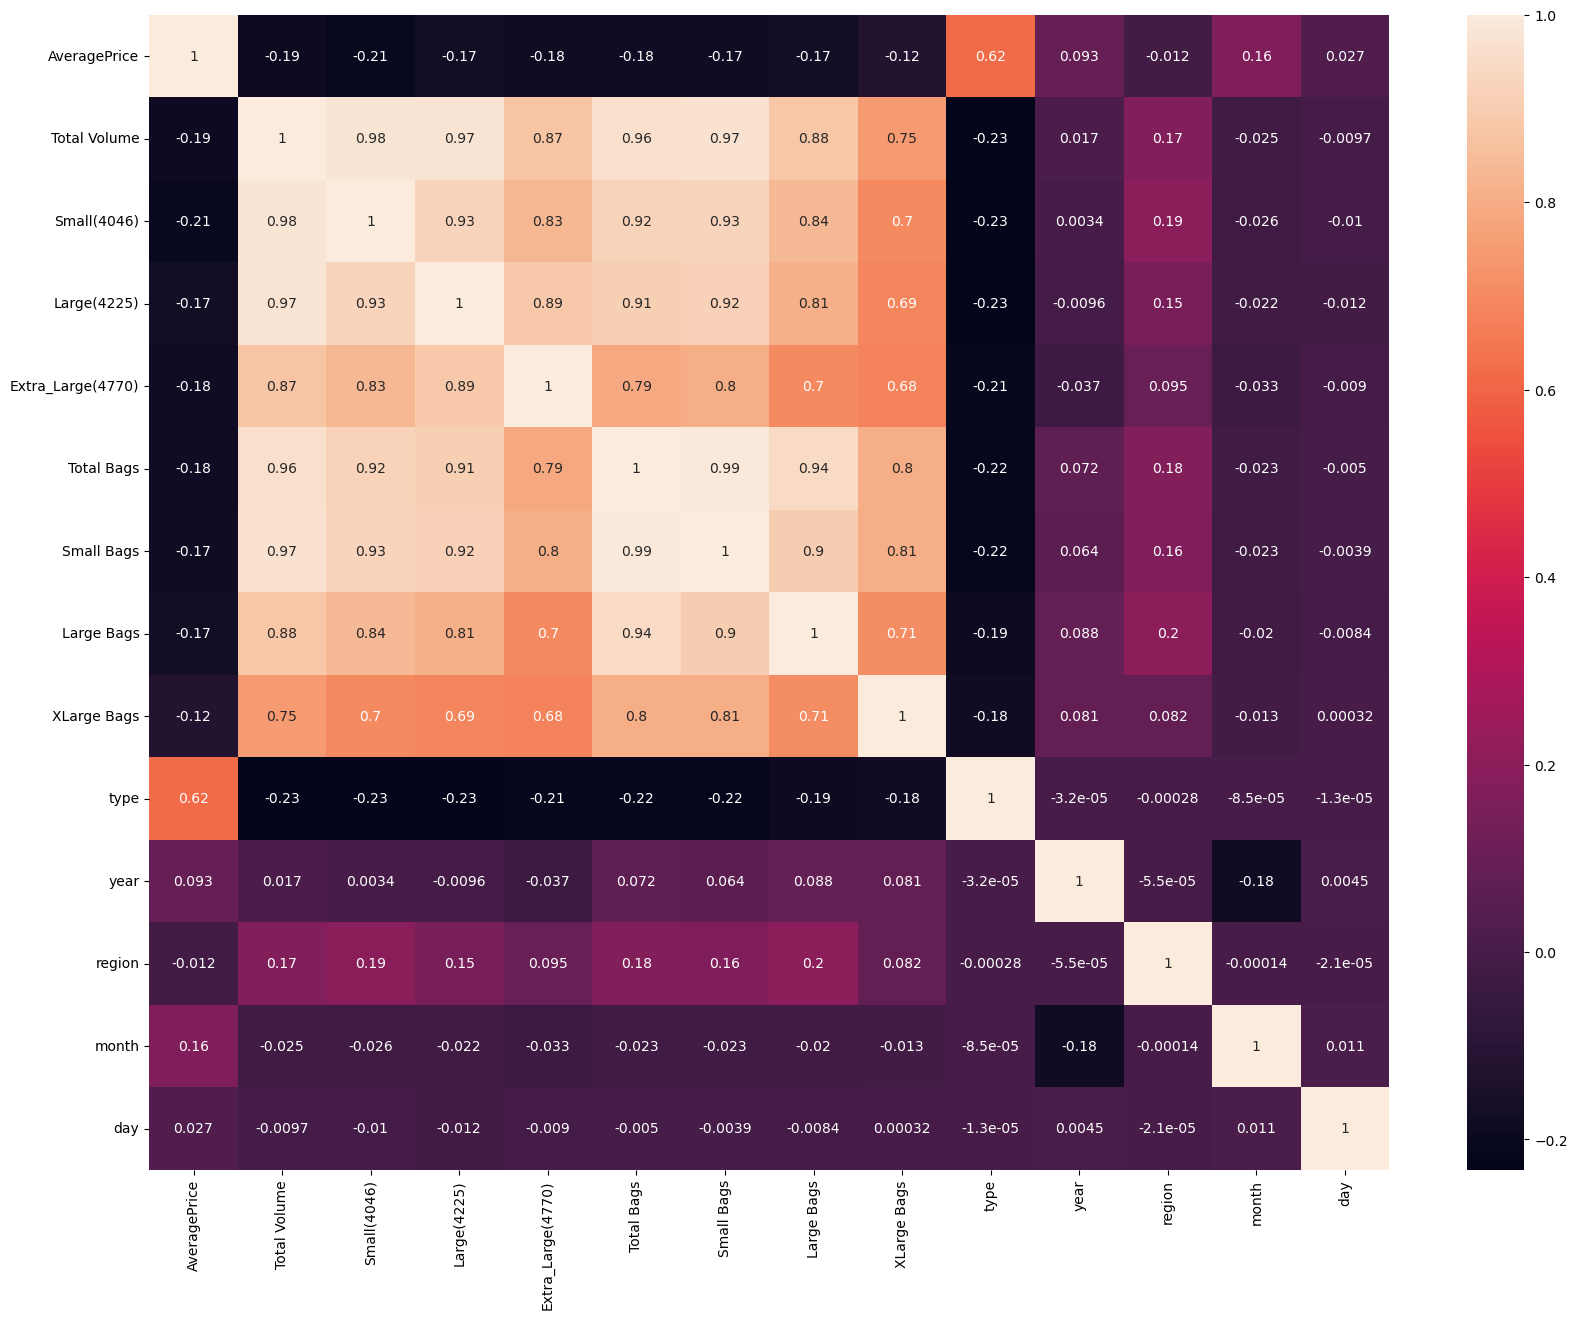

In [40]:
#Visualizing the correlation matrix by plotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(df.corr(),annot=True)

#AveragePrice has positive correlation with type and negative correlation with other columns
#Total Volume has negative correlation with type however it has a positive correlation with the rest of the columns
#The two above are exmaples of multicollinearity which will be dealt with in Standard Scaling and VIF tool

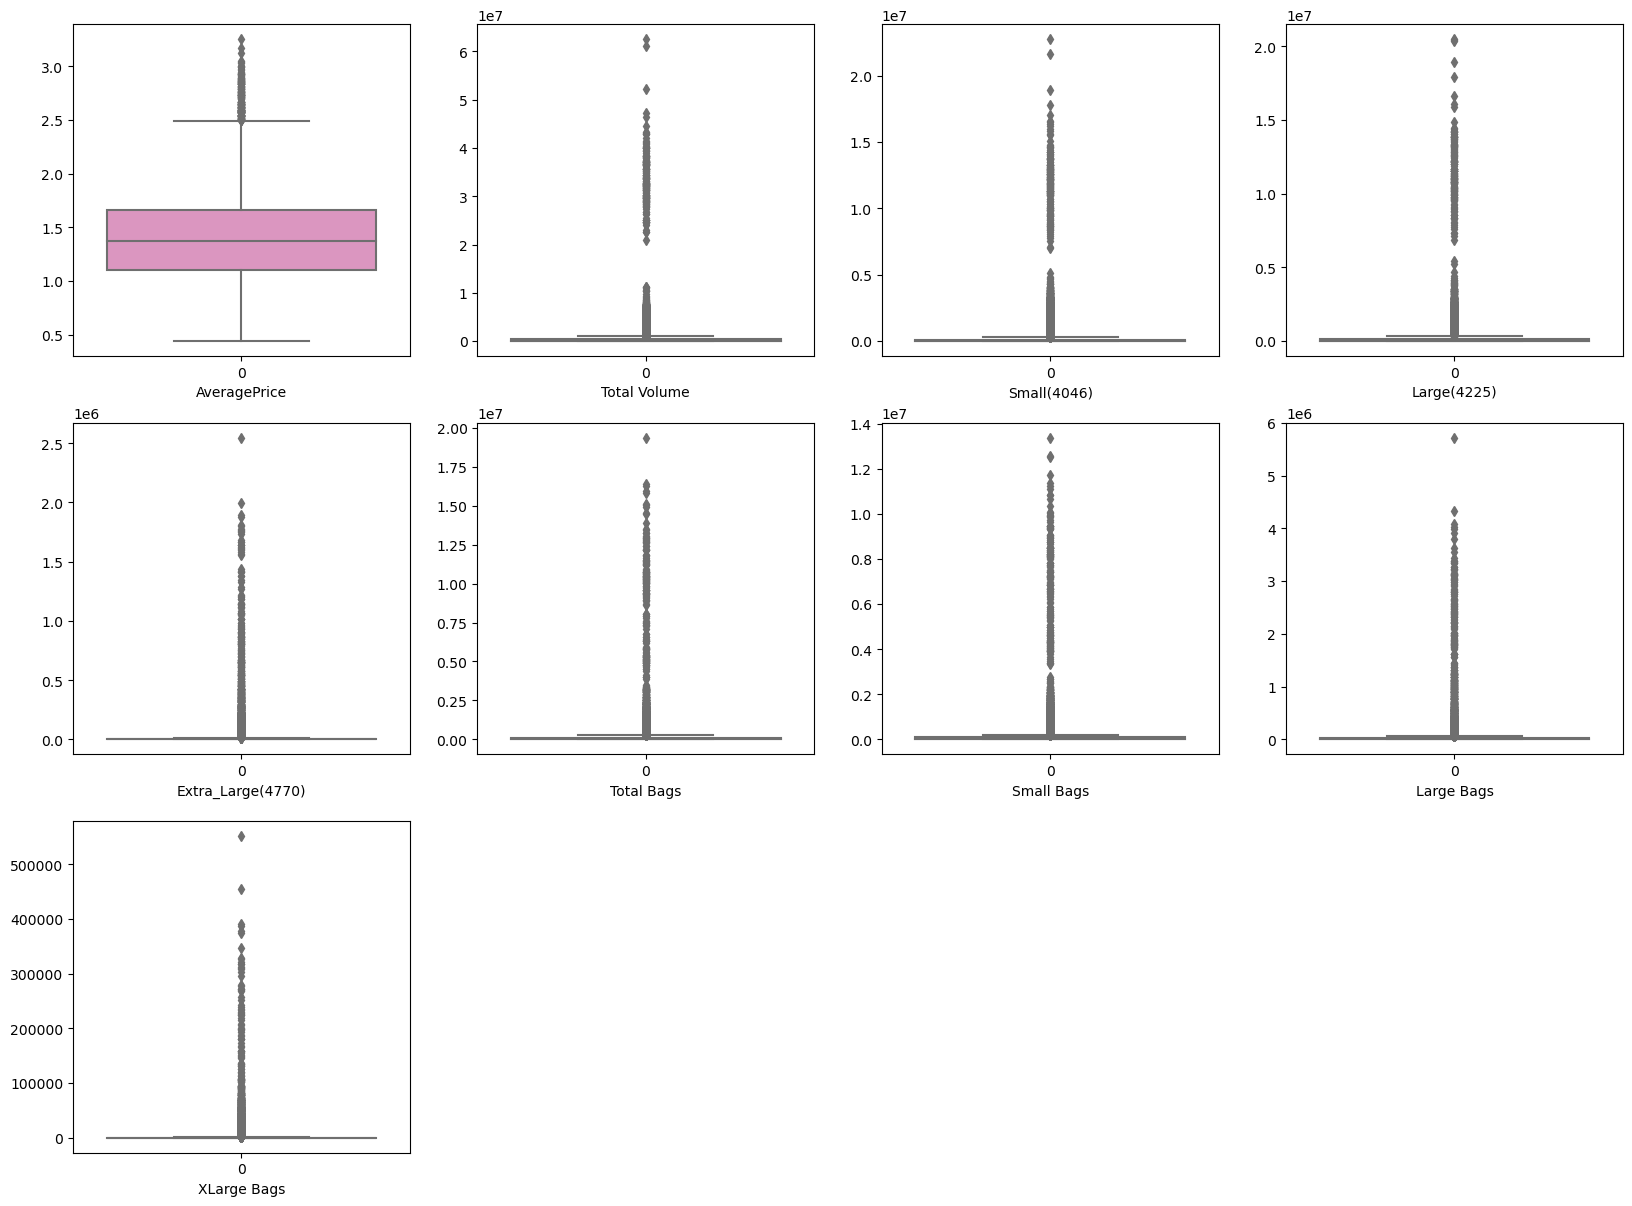

In [41]:
#Visualize outliers and removing them
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=9:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette ="Set2_r")
        plt.xlabel(i)
        
    p+=1
    
plt.show()

In [42]:
#Remove outliers using zscore method and Inter quartile range method then compare the two
#'Average Price' the target variable is not subjected to outlier removal
from scipy.stats import zscore
out_features=df[['Total Volume', 'Small(4046)', 'Large(4225)',
       'Extra_Large(4770)', 'Total Bags', 'Small Bags', 'Large Bags',
       'XLarge Bags']]
z=np.abs(zscore(out_features))
z

Total Volume  Small(4046)  Large(4225)  Extra_Large(4770)  Total Bags  \
0          0.227716     0.230816     0.199902           0.212091    0.234170   
1          0.230427     0.231103     0.208054           0.211997    0.233350   
2          0.212085     0.231007     0.154478           0.211325    0.234730   
3          0.223444     0.230741     0.185350           0.211864    0.237096   
4          0.231538     0.230891     0.208719           0.211834    0.236718   
...             ...          ...          ...                ...         ...   
18244      0.241373     0.230017     0.243857           0.212540    0.229301   
18245      0.242296     0.230693     0.242277           0.212540    0.233594   
18246      0.242331     0.230693     0.243090           0.205766    0.233463   
18247      0.241625     0.230428     0.242651           0.205774    0.231866   
18248      0.241253     0.229347     0.243170           0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags  
0        0.232647    0.222352      0.17558  
1        0.231568    0.222335      0.17558  
2        0.233399    0.222311      0.17558  
3        0.236568    0.222186      0.17558  
4        0.236154    0.221924      0.17558  
...           ...         ...          ...  
18244    0.226665    0.220964      0.17558  
18245    0.232196    0.221403      0.17558  
18246    0.231644    0.222561      0.17558  
18247    0.229543    0.222529      0.17558  
18248    0.228111    0.222628      0.17558  

[18249 rows x 8 columns]

In [43]:
#removing the data above zscore and creating new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(17782, 14)

In [44]:
#shape of old and new dataframe
print("Original Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

Original Data Frame- 18249
New Data Frame- 17782


In [45]:
print("Data Loss Percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)
#there is a 3.3% data loss when using zscore to remove outliers

Data Loss Percentage- 2.55904433119623


In [46]:
#new dataframe after removing outliers buy use of zscore
df1

AveragePrice  Total Volume  Small(4046)  Large(4225)  \
0              1.33      64236.62      1036.74     54454.85   
1              1.35      54876.98       674.28     44638.81   
2              0.93     118220.22       794.70    109149.67   
3              1.08      78992.15      1132.00     71976.41   
4              1.28      51039.60       941.48     43838.39   
...             ...           ...          ...          ...   
18244          1.63      17074.83      2046.96      1529.20   
18245          1.71      13888.04      1191.70      3431.50   
18246          1.87      13766.76      1191.92      2452.79   
18247          1.93      16205.22      1527.63      2981.04   
18248          1.62      17489.58      2894.77      2356.13   

       Extra_Large(4770)  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0                  48.16     8696.87     8603.62       93.25          0.0   
1                  58.33     9505.56     9408.07       97.49          0.0   
2                 130.50     8145.35     8042.21      103.14          0.0   
3                  72.58     5811.16     5677.40      133.76          0.0   
4                  75.78     6183.95     5986.26      197.69          0.0   
...                  ...         ...         ...         ...          ...   
18244               0.00    13498.67    13066.82      431.85          0.0   
18245               0.00     9264.84     8940.04      324.80          0.0   
18246             727.94     9394.11     9351.80       42.31          0.0   
18247             727.01    10969.54    10919.54       50.00          0.0   
18248             224.53    12014.15    11988.14       26.01          0.0   

       type  year  region  month  day  
0         0  2015       0     12   27  
1         0  2015       0     12   20  
2         0  2015       0     12   13  
3         0  2015       0     12    6  
4         0  2015       0     11   29  
...     ...   ...     ...    ...  ...  
18244     1  2018      53      2    4  
18245     1  2018      53      1   28  
18246     1  2018      53      1   21  
18247     1  2018      53      1   14  
18248     1  2018      53      1    7  

[17782 rows x 14 columns]

In [47]:
#Removing outliers using the interquartile range method
#1st quartile
Q1=out_features.quantile(0.25) 

#3rd quartile
Q3=out_features.quantile(0.75)

#IQR
IQR=Q3-Q1
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df2.shape

(11747, 14)

In [49]:
print("Data Loss Percentage-",((df.shape[0]-df2.shape[0])/df.shape[0])*100)
#there is a 36% data loss when using IQR method to remove outliers

Data Loss Percentage- 35.62934955340019


In [ ]:
#the interquartile range method will result in massive loss of data above the acceptable 10% loss,therefore  I will select Z score as the best method

In [50]:
#I am giving a name to the data frame that I will use again to solve for the second requirement
df=df1

In [115]:
df1#this is the clean dataframe I will use going forward

AveragePrice  Total Volume  Small(4046)  Large(4225)  \
0              1.33     -0.065094    -0.649918     0.358278   
1              1.35     -0.137269    -0.770067     0.276355   
2              0.93      0.215503    -0.724508     0.656010   
3              1.08      0.029840    -0.625017     0.475615   
4              1.28     -0.170456    -0.677083     0.268966   
...             ...           ...          ...          ...   
18244          1.63     -0.668931    -0.454078    -0.922232   
18245          1.71     -0.762380    -0.610403    -0.665649   
18246          1.87     -0.766344    -0.610350    -0.774395   
18247          1.93     -0.692595    -0.539211    -0.711605   
18248          1.62     -0.658062    -0.351503    -0.787209   

       Extra_Large(4770)  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0              -0.212550   -0.527445   -0.337064   -0.775214      -0.6878   
1              -0.165117   -0.488205   -0.301038   -0.765237      -0.6878   
2               0.034215   -0.556204   -0.364044   -0.752534      -0.6878   
3              -0.110976   -0.702370   -0.500341   -0.693012      -0.6878   
4              -0.100289   -0.675712   -0.479918   -0.600755      -0.6878   
...                  ...         ...         ...         ...          ...   
18244          -1.224990   -0.331042   -0.165765   -0.405895      -0.6878   
18245          -1.224990   -0.499550   -0.321645   -0.478556      -0.6878   
18246           0.455355   -0.493424   -0.303466   -0.945246      -0.6878   
18247           0.455045   -0.424475   -0.240252   -0.910471      -0.6878   
18248           0.168008   -0.383676   -0.201685   -1.042930      -0.6878   

       type  year  region  month  day  
0         0  2015       0     12   27  
1         0  2015       0     12   20  
2         0  2015       0     12   13  
3         0  2015       0     12    6  
4         0  2015       0     11   29  
...     ...   ...     ...    ...  ...  
18244     1  2018      53      2    4  
18245     1  2018      53      1   28  
18246     1  2018      53      1   21  
18247     1  2018      53      1   14  
18248     1  2018      53      1    7  

[17782 rows x 14 columns]

In [52]:
#Checking for Skewness
df.skew()
#Skeweness is acceptable only within the range of -0.5 and 0.5.On that basis,all the columns except Average Price and categorical columns fall short of that criteria.

AveragePrice         0.560969
Total Volume         3.782060
Small(4046)          4.928850
Large(4225)          4.472729
Extra_Large(4770)    5.137120
Total Bags           4.082103
Small Bags           4.238647
Large Bags           5.072468
XLarge Bags          6.159391
type                -0.052210
year                 0.220792
region               0.005773
month                0.098217
day                  0.011251
dtype: float64

In [53]:
#Removing skeweness  using the cuberoot method
df.skew()

df['XLarge Bags']=np.cbrt(df['XLarge Bags'])

In [54]:
#Checking for Skewness after using the cuberoot method
df.skew()
#cuberoot method did not work

AveragePrice         0.560969
Total Volume         3.782060
Small(4046)          4.928850
Large(4225)          4.472729
Extra_Large(4770)    5.137120
Total Bags           4.082103
Small Bags           4.238647
Large Bags           5.072468
XLarge Bags          2.288933
type                -0.052210
year                 0.220792
region               0.005773
month                0.098217
day                  0.011251
dtype: float64

In [55]:
#Removing skeweness in XLarge Bags using log1p method
df["XLarge Bags"]=np.log1p(df["XLarge Bags"])

In [56]:
#Checking for Skewness after using the log1p method
df.skew()
#log1p method did not work

AveragePrice         0.560969
Total Volume         3.782060
Small(4046)          4.928850
Large(4225)          4.472729
Extra_Large(4770)    5.137120
Total Bags           4.082103
Small Bags           4.238647
Large Bags           5.072468
XLarge Bags          1.120651
type                -0.052210
year                 0.220792
region               0.005773
month                0.098217
day                  0.011251
dtype: float64

In [57]:
#Removing skeweness using yeo johnson method  (this is the suitable method because the skewness values are positive)
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

In [58]:
#Removing skewness using yeo-johnson
df[['Total Volume','Small(4046)','Large(4225)','Extra_Large(4770)','Total Bags','Small Bags','Large Bags','XLarge Bags']] = scaler.fit_transform(df[['Total Volume','Small(4046)','Large(4225)','Extra_Large(4770)','Total Bags','Small Bags','Large Bags','XLarge Bags']].values)

In [59]:
#check for skeweness again
df.skew()
#skeweness successfully removed from all the relevant columns

AveragePrice         0.560969
Total Volume        -0.006809
Small(4046)         -0.038259
Large(4225)         -0.043246
Extra_Large(4770)    0.028015
Total Bags          -0.021531
Small Bags          -0.024657
Large Bags          -0.110061
XLarge Bags          0.778668
type                -0.052210
year                 0.220792
region               0.005773
month                0.098217
day                  0.011251
dtype: float64

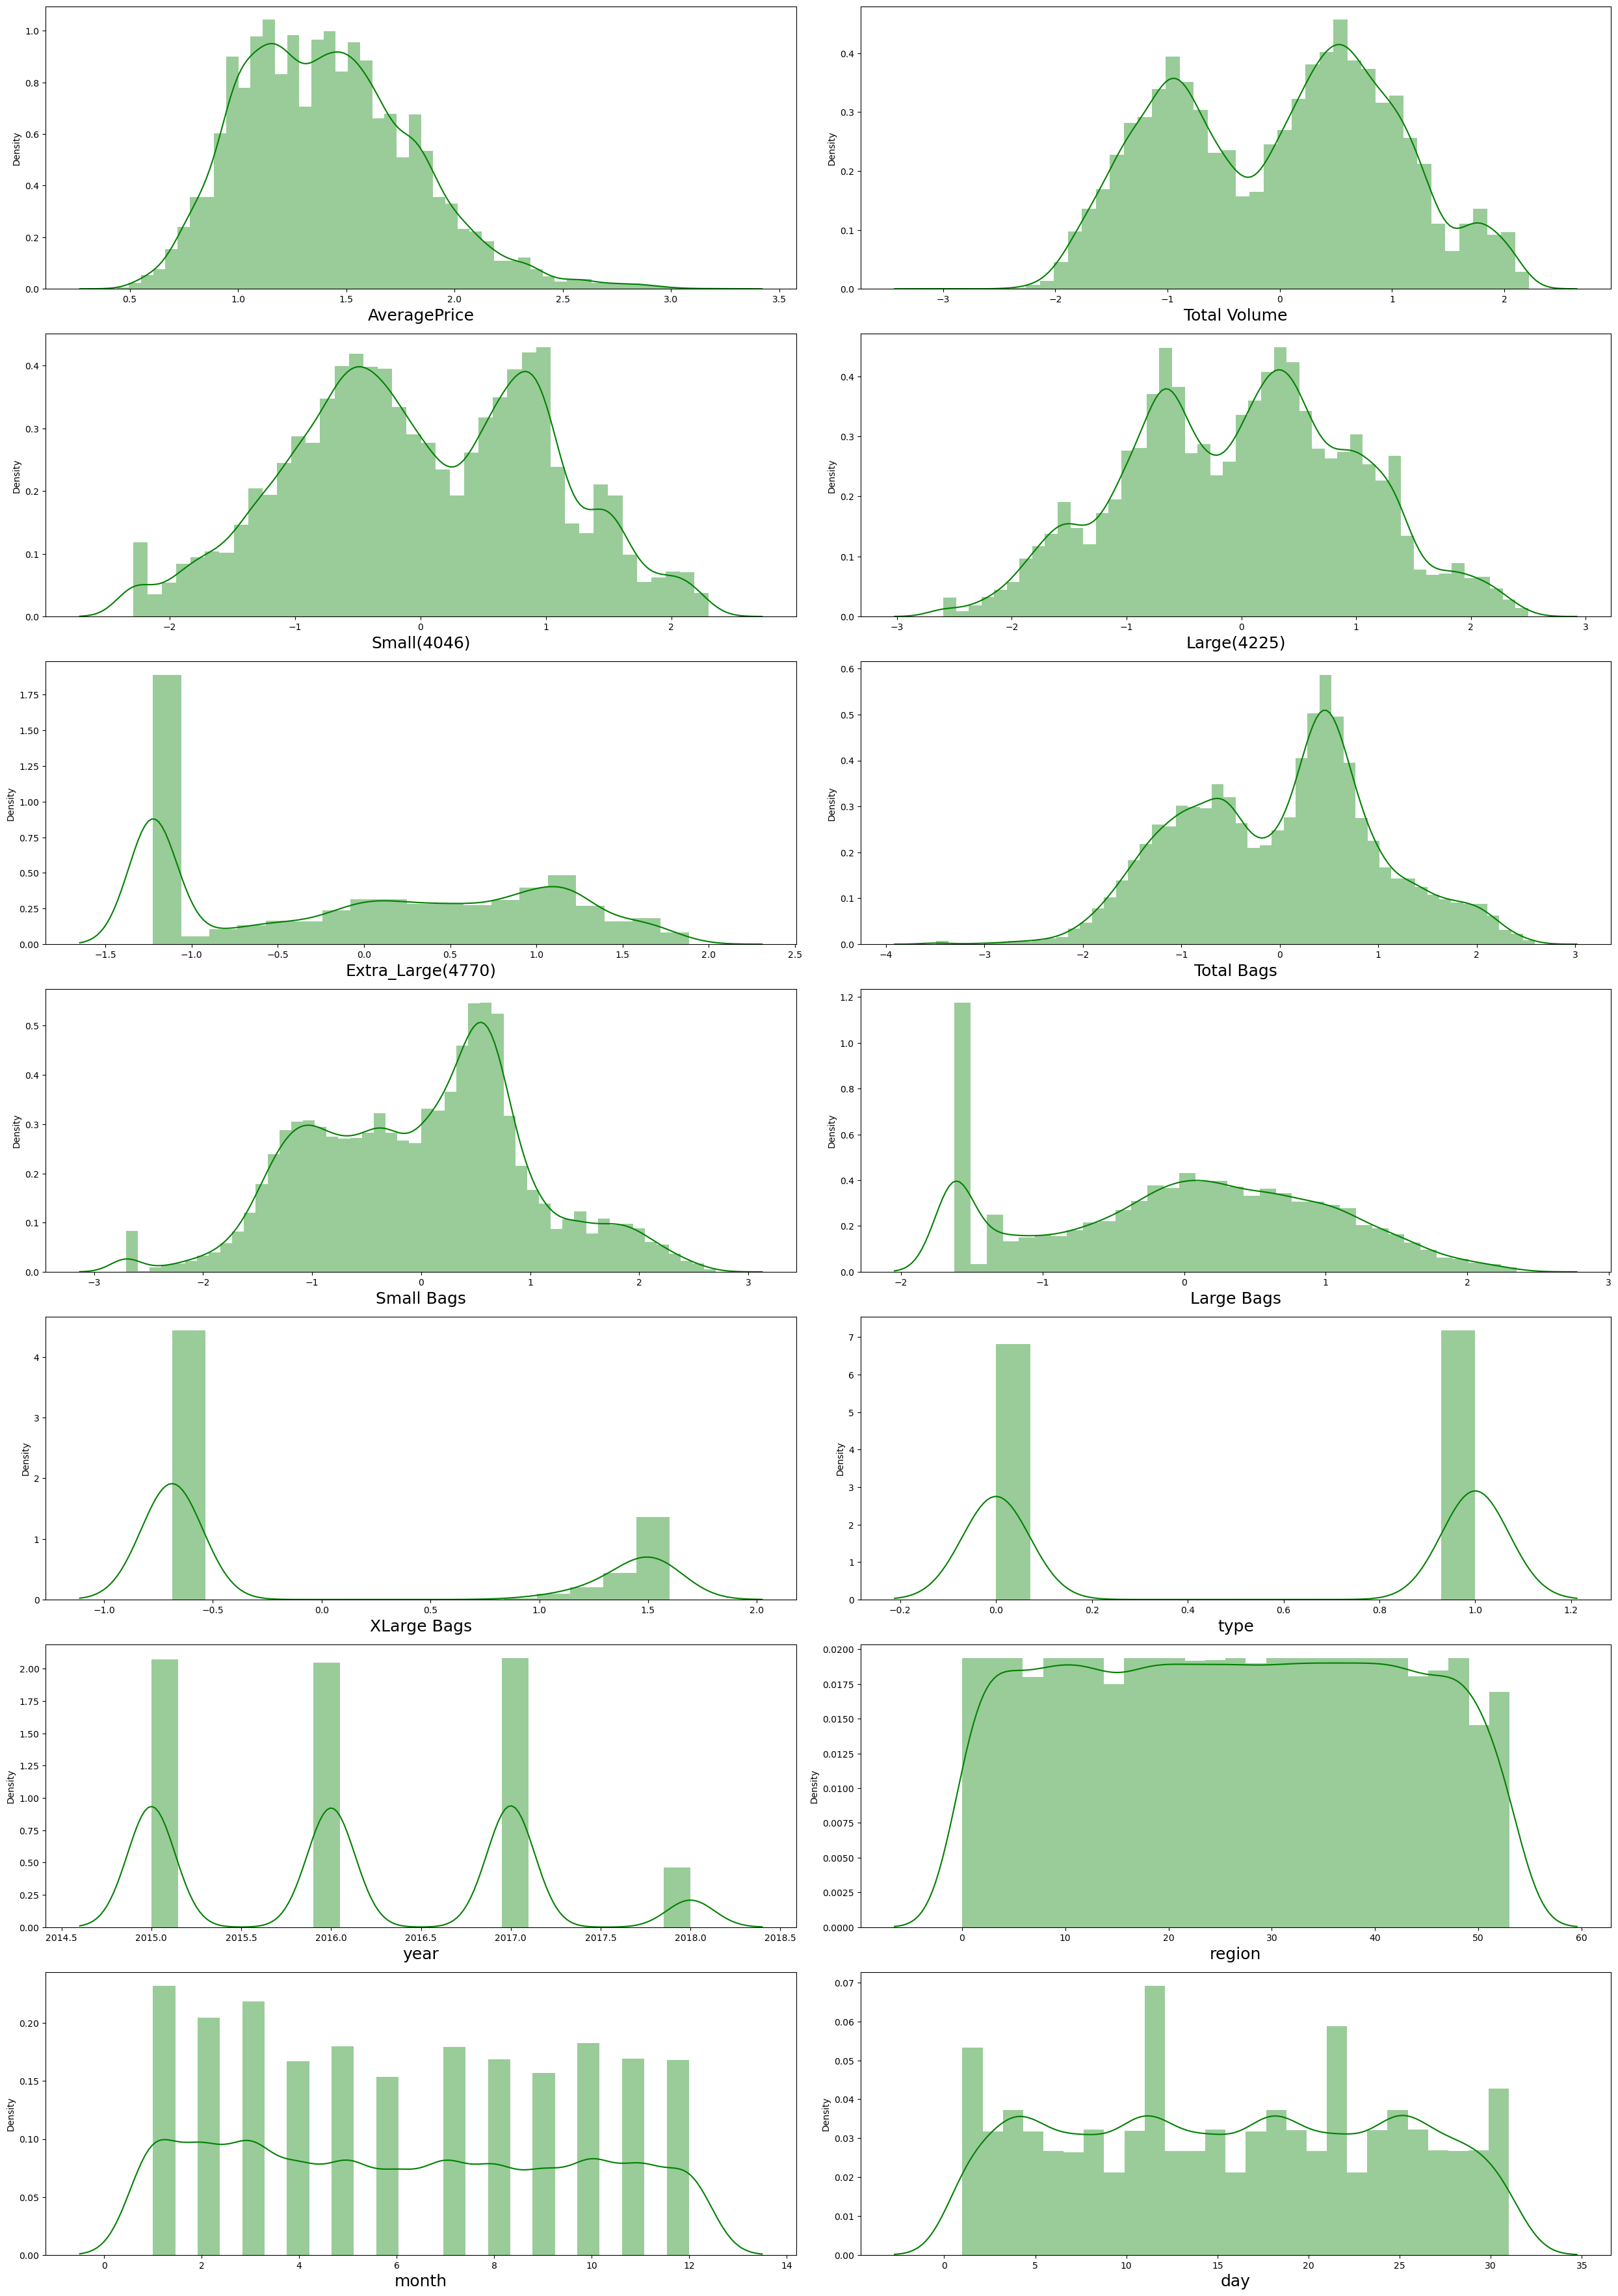

In [60]:
#Visualize distribution of data after removing skeweness from columns Hits(H),Completed games(CG),Shoutouts(SHO),Saves(SV),Errors(E)

plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=17:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'green')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()#all the graphs now resemble normal distribution as portrayed by the bell shapes

In [ ]:
#Dealing with multicollinearity.It be must removed but before that we need to seperate features and labels
#As per problem statement,we deal with region first.

In [61]:
#seperate the target and independent variables into x and y
x=df.drop("region",axis=1)
y=df["region"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (17782, 13)
Label Dimension= (17782,)


In [62]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

AveragePrice  Total Volume  Small(4046)  Large(4225)  \
0         -0.212660     -0.065094    -0.649918     0.358278   
1         -0.162942     -0.137269    -0.770067     0.276355   
2         -1.207026      0.215503    -0.724508     0.656010   
3         -0.834139      0.029840    -0.625017     0.475615   
4         -0.336956     -0.170456    -0.677083     0.268966   
...             ...           ...          ...          ...   
17777      0.533114     -0.668931    -0.454078    -0.922232   
17778      0.731987     -0.762380    -0.610403    -0.665649   
17779      1.129733     -0.766344    -0.610350    -0.774395   
17780      1.278888     -0.692595    -0.539211    -0.711605   
17781      0.508255     -0.658062    -0.351503    -0.787209   

       Extra_Large(4770)  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0              -0.212550   -0.527445   -0.337064   -0.775214      -0.6878   
1              -0.165117   -0.488205   -0.301038   -0.765237      -0.6878   
2               0.034215   -0.556204   -0.364044   -0.752534      -0.6878   
3              -0.110976   -0.702370   -0.500341   -0.693012      -0.6878   
4              -0.100289   -0.675712   -0.479918   -0.600755      -0.6878   
...                  ...         ...         ...         ...          ...   
17777          -1.224990   -0.331042   -0.165765   -0.405895      -0.6878   
17778          -1.224990   -0.499550   -0.321645   -0.478556      -0.6878   
17779           0.455355   -0.493424   -0.303466   -0.945246      -0.6878   
17780           0.455045   -0.424475   -0.240252   -0.910471      -0.6878   
17781           0.168008   -0.383676   -0.201685   -1.042930      -0.6878   

           type      year     month       day  
0     -1.026443 -1.214908  1.641434  1.289235  
1     -1.026443 -1.214908  1.641434  0.491750  
2     -1.026443 -1.214908  1.641434 -0.305734  
3     -1.026443 -1.214908  1.641434 -1.103219  
4     -1.026443 -1.214908  1.358706  1.517088  
...         ...       ...       ...       ...  
17777  0.974238  1.979143 -1.185845 -1.331072  
17778  0.974238  1.979143 -1.468572  1.403161  
17779  0.974238  1.979143 -1.468572  0.605677  
17780  0.974238  1.979143 -1.468572 -0.191808  
17781  0.974238  1.979143 -1.468572 -0.989293  

[17782 rows x 13 columns]

In [63]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values           Features
0     2.269667       AveragePrice
1    53.089913       Total Volume
2     6.823306        Small(4046)
3    12.222619        Large(4225)
4     3.967624  Extra_Large(4770)
5    35.483102         Total Bags
6    17.222543         Small Bags
7     3.479025         Large Bags
8     2.072572        XLarge Bags
9     4.249805               type
10    1.537814               year
11    1.144221              month
12    1.001699                day

In [ ]:
#VIF values above 10 are were multicolinearity exists in Total Volume,Large(4225),Total Bags and Small Bags. So let me drop the columns starting with that with the highest VIF value to avoid multicolinearity.

In [64]:
#Droping Total Volume
x = x.drop(["Total Volume"],axis=1)

In [65]:
x.head()#checking the if the column has been removed

AveragePrice  Small(4046)  Large(4225)  Extra_Large(4770)  Total Bags  \
0     -0.212660    -0.649918     0.358278          -0.212550   -0.527445   
1     -0.162942    -0.770067     0.276355          -0.165117   -0.488205   
2     -1.207026    -0.724508     0.656010           0.034215   -0.556204   
3     -0.834139    -0.625017     0.475615          -0.110976   -0.702370   
4     -0.336956    -0.677083     0.268966          -0.100289   -0.675712   

   Small Bags  Large Bags  XLarge Bags      type      year     month       day  
0   -0.337064   -0.775214      -0.6878 -1.026443 -1.214908  1.641434  1.289235  
1   -0.301038   -0.765237      -0.6878 -1.026443 -1.214908  1.641434  0.491750  
2   -0.364044   -0.752534      -0.6878 -1.026443 -1.214908  1.641434 -0.305734  
3   -0.500341   -0.693012      -0.6878 -1.026443 -1.214908  1.641434 -1.103219  
4   -0.479918   -0.600755      -0.6878 -1.026443 -1.214908  1.358706  1.517088

In [66]:
#check VIF again
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif#vif is still high in Total Bags and Small Bags respectively so this should be removed in the same manner

VIF values           Features
0     2.215146       AveragePrice
1     3.573904        Small(4046)
2     4.647075        Large(4225)
3     3.957232  Extra_Large(4770)
4    26.722351         Total Bags
5    17.211231         Small Bags
6     3.428451         Large Bags
7     2.061518        XLarge Bags
8     4.116553               type
9     1.537697               year
10    1.144220              month
11    1.001683                day

In [67]:
#Droping Total Bags
x = x.drop(["Total Bags"],axis=1)

In [68]:
x.head()#checking the if the column has been removed

AveragePrice  Small(4046)  Large(4225)  Extra_Large(4770)  Small Bags  \
0     -0.212660    -0.649918     0.358278          -0.212550   -0.337064   
1     -0.162942    -0.770067     0.276355          -0.165117   -0.301038   
2     -1.207026    -0.724508     0.656010           0.034215   -0.364044   
3     -0.834139    -0.625017     0.475615          -0.110976   -0.500341   
4     -0.336956    -0.677083     0.268966          -0.100289   -0.479918   

   Large Bags  XLarge Bags      type      year     month       day  
0   -0.775214      -0.6878 -1.026443 -1.214908  1.641434  1.289235  
1   -0.765237      -0.6878 -1.026443 -1.214908  1.641434  0.491750  
2   -0.752534      -0.6878 -1.026443 -1.214908  1.641434 -0.305734  
3   -0.693012      -0.6878 -1.026443 -1.214908  1.641434 -1.103219  
4   -0.600755      -0.6878 -1.026443 -1.214908  1.358706  1.517088

In [69]:
#check VIF again
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif
#multicollinearity has been completely removed
#All VIF values are now below 10.This means that multicollinearity/biasness has been solved so we can proceeed with model building

VIF values           Features
0     2.029596       AveragePrice
1     3.566883        Small(4046)
2     4.354626        Large(4225)
3     3.956536  Extra_Large(4770)
4     4.186175         Small Bags
5     2.067887         Large Bags
6     2.061493        XLarge Bags
7     4.085878               type
8     1.468403               year
9     1.131657              month
10    1.001669                day

In [70]:
#Modelling

#Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  0.9220243673851921 at random_state 121


In [71]:
#creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [95]:
#Import classification algorithms

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [90]:
#checking accuracy for Random Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9169634489222118
[[94  0  0 ...  0  0  0]
 [ 0 86  0 ...  0  0  0]
 [ 0  0 95 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  1 65  0]
 [ 0  1  0 ...  0  0 69]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       102
           1       0.90      0.85      0.87       101
           2       1.00      0.99      0.99        96
           3       0.93      0.85      0.89       102
           4       0.96      0.97      0.97       104
           5       0.89      0.84      0.87       107
           6       0.98      1.00      0.99        83
           7       0.92      0.92      0.92       110
           8       0.96      0.99      0.98       105
           9       0.89      0.96      0.92        95
          10       0.88      0.85      0.86       100
          11       0.93      0.94      0.94       101
          12       0.96      1.00      0.98        97
          13       0.87      0.87      0.87       107
          14  

In [73]:
#checking testing accuracy:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.6144329896907217
[[79  0  0 ...  0  0  0]
 [ 0 52  0 ...  0  0  0]
 [ 0  0 88 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  1 53  0]
 [ 0  4  1 ...  0  0 39]]
              precision    recall  f1-score   support

           0       0.51      0.77      0.61       102
           1       0.36      0.51      0.42       101
           2       0.59      0.92      0.72        96
           3       0.70      0.61      0.65       102
           4       0.63      0.85      0.72       104
           5       0.45      0.40      0.43       107
           6       0.71      0.78      0.74        83
           7       0.51      0.74      0.60       110
           8       0.85      0.83      0.84       105
           9       0.40      0.63      0.49        95
          10       0.27      0.45      0.33       100
          11       0.63      0.79      0.70       101
          12       0.84      0.88      0.86        97
          13       0.44      0.37      0.40       107
          14  

In [74]:
#checking accuracy of Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.5014058106841612
[[72  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  1]
 [ 0  0 56 ...  0  0  2]
 ...
 [ 0  0  0 ... 43  2  0]
 [ 0  0  0 ...  0 53  0]
 [ 0  3  0 ...  0  0 10]]
              precision    recall  f1-score   support

           0       0.52      0.71      0.60       102
           1       0.27      0.48      0.34       101
           2       0.53      0.58      0.56        96
           3       0.59      0.39      0.47       102
           4       0.53      0.53      0.53       104
           5       0.49      0.36      0.42       107
           6       0.73      0.92      0.81        83
           7       0.56      0.64      0.60       110
           8       0.69      0.77      0.73       105
           9       0.47      0.79      0.59        95
          10       0.56      0.42      0.48       100
          11       0.58      0.64      0.61       101
          12       0.41      0.56      0.47        97
          13       0.09      0.06      0.07       107
          14  

In [96]:
#checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.7715089034676663
[[95  0  0 ...  0  0  0]
 [ 0 57  0 ...  0  0  0]
 [ 0  0 90 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  1  0 ...  0  0 54]]
              precision    recall  f1-score   support

           0       0.69      0.93      0.79       102
           1       0.56      0.56      0.56       101
           2       0.90      0.94      0.92        96
           3       0.85      0.61      0.71       102
           4       0.87      0.86      0.86       104
           5       0.82      0.57      0.67       107
           6       0.98      0.99      0.98        83
           7       0.72      0.76      0.74       110
           8       0.96      0.94      0.95       105
           9       0.66      0.86      0.75        95
          10       0.43      0.60      0.50       100
          11       0.80      0.83      0.82       101
          12       0.92      0.95      0.93        97
          13       0.59      0.62      0.60       107
          14  

In [76]:
#checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8337394564198688
[[91  0  0 ...  0  0  0]
 [ 0 70  0 ...  0  0  3]
 [ 0  0 92 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  4  0]
 [ 0  0  0 ...  0 65  0]
 [ 0  0  0 ...  0  0 65]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       102
           1       0.79      0.69      0.74       101
           2       0.94      0.96      0.95        96
           3       0.88      0.70      0.78       102
           4       0.87      0.83      0.85       104
           5       0.75      0.71      0.73       107
           6       0.99      0.95      0.97        83
           7       0.86      0.85      0.85       110
           8       0.96      0.94      0.95       105
           9       0.86      0.85      0.86        95
          10       0.67      0.74      0.70       100
          11       0.87      0.89      0.88       101
          12       0.91      0.89      0.90        97
          13       0.79      0.84      0.81       107
          14  

In [77]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.08772258669165886
[[ 0  0  1 ...  0  0  0]
 [ 0  3  0 ...  0  0  2]
 [ 0  0 46 ...  0  0  0]
 ...
 [ 0  0 22 ...  8  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       102
           1       0.08      0.03      0.04       101
           2       0.12      0.48      0.19        96
           3       0.00      0.00      0.00       102
           4       0.14      0.27      0.19       104
           5       0.00      0.00      0.00       107
           6       0.00      0.00      0.00        83
           7       0.67      0.02      0.04       110
           8       0.00      0.00      0.00       105
           9       0.00      0.00      0.00        95
          10       0.04      0.39      0.08       100
          11       0.15      0.49      0.23       101
          12       0.57      0.04      0.08        97
          13       0.00      0.00      0.00       107
          14 

In [78]:
#checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8586691658856608
[[89  0  0 ...  0  0  0]
 [ 0 79  0 ...  0  0  0]
 [ 0  0 93 ...  0  0  1]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  1  0 ...  0  0 60]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       102
           1       0.77      0.78      0.78       101
           2       0.97      0.97      0.97        96
           3       0.86      0.87      0.86       102
           4       0.91      0.93      0.92       104
           5       0.70      0.77      0.73       107
           6       0.96      0.99      0.98        83
           7       0.84      0.86      0.85       110
           8       0.94      0.97      0.96       105
           9       0.88      0.93      0.90        95
          10       0.76      0.74      0.75       100
          11       0.91      0.91      0.91       101
          12       0.91      0.91      0.91        97
          13       0.84      0.85      0.85       107
          14  

In [79]:
#checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9259606373008434
[[97  0  0 ...  0  0  0]
 [ 0 88  0 ...  0  0  0]
 [ 0  0 96 ...  0  0  0]
 ...
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ...  1 65  0]
 [ 0  1  0 ...  0  0 75]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       102
           1       0.90      0.87      0.88       101
           2       0.98      1.00      0.99        96
           3       0.93      0.86      0.89       102
           4       0.98      0.98      0.98       104
           5       0.92      0.88      0.90       107
           6       0.98      1.00      0.99        83
           7       0.93      0.95      0.94       110
           8       0.97      0.99      0.98       105
           9       0.87      0.95      0.90        95
          10       0.91      0.88      0.89       100
          11       0.95      0.94      0.95       101
          12       0.99      0.99      0.99        97
          13       0.93      0.89      0.91       107
          14  

In [87]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [91]:
#Checking CV score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predRFC)-score.mean())

[0.67416362 0.82175991 0.75984252 0.68869516 0.49015748]
0.6869237388340234
Difference between Accuracy score and cross validation score is - 0.23003971008818846


In [86]:
#Checking CV score for KNeighbours Classifier
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predKNN)-score.mean())

[0.44278887 0.4500984  0.4223847  0.40748031 0.33970754]
0.41249196359591955
Difference between Accuracy score and cross validation score is - 0.20194102609480213


In [92]:
#Checking CV score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predLR)-score.mean())

[0.335395   0.34917065 0.45134983 0.42604049 0.28515186]
0.3694215654867713
Difference between Accuracy score and cross validation score is - 0.13198424519738994


In [97]:
#Checking CV score for Support Vector Machine Classifier
score=cross_val_score(SVC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predSVC)-score.mean())

[0.59910037 0.66629182 0.6307649  0.58042745 0.42322835]
0.5799625763675802
Difference between Accuracy score and cross validation score is - 0.19154632710008612


In [98]:
#Checking CV score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predGB)-score.mean())

[0.48411583 0.75344391 0.71906637 0.63526434 0.39651294]
0.5976806771799013
Difference between Accuracy score and cross validation score is - 0.23605877923996754


In [99]:
#Checking CV score for AdaBoost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predABC)-score.mean())

[0.03907787 0.03036267 0.05258718 0.08070866 0.05230596]
0.051008467911148436
Difference between Accuracy score and cross validation score is - 0.036714118780510424


In [100]:
#Checking CV score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predBC)-score.mean())

[0.58195108 0.74051167 0.69572553 0.59336333 0.44066367]
0.6104430560883292
Difference between Accuracy score and cross validation score is - 0.24822610979733162


In [101]:
#Checking CV score for ExtraTreesClassifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predET)-score.mean())

[0.70761878 0.78774248 0.78065242 0.69600675 0.53205849]
0.7008157839561593
Difference between Accuracy score and cross validation score is - 0.22514485334468415


In [ ]:
#I selected Adaboostclassifier as the best model because it has the least difference between Accuracy and cross validation score which is 0.04.

In [109]:
#Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[1,2,50],'learning_rate':[0.0001, 0.001, 0.01, 0.1, 1.0],'algorithm':['SAMME.R'],'random_state':[10,50,100,'None']}

GVC=GridSearchCV(AdaBoostClassifier(),parameters,cv=5)
GVC.fit(x_train,y_train)

GVC.best_params_
{'n_estimators':50,'learning_rate':1.0,'algorithm':'SAMME.R','random_state':None}

Final_model=AdaBoostClassifier(n_estimators=50,learning_rate=1.0,algorithm='SAMME.R',random_state=None)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

8.772258669165886


In [110]:
#Saving the model
import joblib
joblib.dump(Final_model,"Avocado_Project_Region.pkl")

['Avocado_Project_Region.pkl']

In [111]:
#Loading the saved model to get predictions
model=joblib.load("Avocado_Project_Region.pkl")

In [112]:
#Prediction
prediction=model.predict(x_test)
prediction

array([11,  4, 37, ...,  2, 37, 18])

In [113]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df
#the predictions for region

Predicted  Original
0            11        18
1             4        14
2            37        23
3            10         6
4            10        26
...         ...       ...
5330         37        35
5331         10        39
5332          2        30
5333         37         2
5334         18        15

[5335 rows x 2 columns]

In [ ]:
#Second part of the solution is a Regression Model as prescribed

In [116]:
#fetching my clean data frame saved earlier
df1

AveragePrice  Total Volume  Small(4046)  Large(4225)  \
0              1.33     -0.065094    -0.649918     0.358278   
1              1.35     -0.137269    -0.770067     0.276355   
2              0.93      0.215503    -0.724508     0.656010   
3              1.08      0.029840    -0.625017     0.475615   
4              1.28     -0.170456    -0.677083     0.268966   
...             ...           ...          ...          ...   
18244          1.63     -0.668931    -0.454078    -0.922232   
18245          1.71     -0.762380    -0.610403    -0.665649   
18246          1.87     -0.766344    -0.610350    -0.774395   
18247          1.93     -0.692595    -0.539211    -0.711605   
18248          1.62     -0.658062    -0.351503    -0.787209   

       Extra_Large(4770)  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0              -0.212550   -0.527445   -0.337064   -0.775214      -0.6878   
1              -0.165117   -0.488205   -0.301038   -0.765237      -0.6878   
2               0.034215   -0.556204   -0.364044   -0.752534      -0.6878   
3              -0.110976   -0.702370   -0.500341   -0.693012      -0.6878   
4              -0.100289   -0.675712   -0.479918   -0.600755      -0.6878   
...                  ...         ...         ...         ...          ...   
18244          -1.224990   -0.331042   -0.165765   -0.405895      -0.6878   
18245          -1.224990   -0.499550   -0.321645   -0.478556      -0.6878   
18246           0.455355   -0.493424   -0.303466   -0.945246      -0.6878   
18247           0.455045   -0.424475   -0.240252   -0.910471      -0.6878   
18248           0.168008   -0.383676   -0.201685   -1.042930      -0.6878   

       type  year  region  month  day  
0         0  2015       0     12   27  
1         0  2015       0     12   20  
2         0  2015       0     12   13  
3         0  2015       0     12    6  
4         0  2015       0     11   29  
...     ...   ...     ...    ...  ...  
18244     1  2018      53      2    4  
18245     1  2018      53      1   28  
18246     1  2018      53      1   21  
18247     1  2018      53      1   14  
18248     1  2018      53      1    7  

[17782 rows x 14 columns]

In [143]:
#check VIF
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif
#there is multicollinearity

VIF values           Features
0    52.139728       Total Volume
1     7.154886        Small(4046)
2    11.169545        Large(4225)
3     3.952611  Extra_Large(4770)
4    34.513078         Total Bags
5    16.637214         Small Bags
6     3.463145         Large Bags
7     2.078416        XLarge Bags
8     3.762896               type
9     1.386342               year
10    1.085441             region
11    1.054317              month
12    1.000799                day

In [144]:
#Dropping Total Volume
x = x.drop(["Total Volume"],axis=1)

In [145]:
#check VIF again
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

VIF values           Features
0     3.742579        Small(4046)
1     4.283865        Large(4225)
2     3.938172  Extra_Large(4770)
3    24.484132         Total Bags
4    16.636882         Small Bags
5     3.421094         Large Bags
6     2.065315        XLarge Bags
7     3.545438               type
8     1.383918               year
9     1.078673             region
10    1.052273              month
11    1.000726                day

In [146]:
#Dropping Total Bags
x = x.drop(["Total Bags"],axis=1)

In [147]:
#check VIF again
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif#Multicollinearity has been removed

VIF values           Features
0     3.723945        Small(4046)
1     4.139317        Large(4225)
2     3.937913  Extra_Large(4770)
3     4.101729         Small Bags
4     1.866020         Large Bags
5     2.065105        XLarge Bags
6     3.542242               type
7     1.359478               year
8     1.078666             region
9     1.051636              month
10    1.000548                day

In [149]:
#seperate the target and independent variables into x and y
x=df1.drop("AveragePrice",axis=1)
y=df1["AveragePrice"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (17782, 13)
Label Dimension= (17782,)


In [150]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Total Volume  Small(4046)  Large(4225)  Extra_Large(4770)  Total Bags  \
0         -0.065094    -0.649918     0.358278          -0.212550   -0.527445   
1         -0.137269    -0.770067     0.276355          -0.165117   -0.488205   
2          0.215503    -0.724508     0.656010           0.034215   -0.556204   
3          0.029840    -0.625017     0.475615          -0.110976   -0.702370   
4         -0.170456    -0.677083     0.268966          -0.100289   -0.675712   
...             ...          ...          ...                ...         ...   
17777     -0.668931    -0.454078    -0.922232          -1.224990   -0.331042   
17778     -0.762380    -0.610403    -0.665649          -1.224990   -0.499550   
17779     -0.766344    -0.610350    -0.774395           0.455355   -0.493424   
17780     -0.692595    -0.539211    -0.711605           0.455045   -0.424475   
17781     -0.658062    -0.351503    -0.787209           0.168008   -0.383676   

       Small Bags  Large Bags  XLarge Bags      type      year    region  \
0       -0.337064   -0.775214      -0.6878 -1.026443 -1.214908 -1.698613   
1       -0.301038   -0.765237      -0.6878 -1.026443 -1.214908 -1.698613   
2       -0.364044   -0.752534      -0.6878 -1.026443 -1.214908 -1.698613   
3       -0.500341   -0.693012      -0.6878 -1.026443 -1.214908 -1.698613   
4       -0.479918   -0.600755      -0.6878 -1.026443 -1.214908 -1.698613   
...           ...         ...          ...       ...       ...       ...   
17777   -0.165765   -0.405895      -0.6878  0.974238  1.979143  1.742552   
17778   -0.321645   -0.478556      -0.6878  0.974238  1.979143  1.742552   
17779   -0.303466   -0.945246      -0.6878  0.974238  1.979143  1.742552   
17780   -0.240252   -0.910471      -0.6878  0.974238  1.979143  1.742552   
17781   -0.201685   -1.042930      -0.6878  0.974238  1.979143  1.742552   

          month       day  
0      1.641434  1.289235  
1      1.641434  0.491750  
2      1.641434 -0.305734  
3      1.641434 -1.103219  
4      1.358706  1.517088  
...         ...       ...  
17777 -1.185845 -1.331072  
17778 -1.468572  1.403161  
17779 -1.468572  0.605677  
17780 -1.468572 -0.191808  
17781 -1.468572 -0.989293  

[17782 rows x 13 columns]

In [151]:
#Modelling
#import the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

In [152]:
#Creating train test split
#Finding the best random state

maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"at random_state",maxRS)

Maximum r2 score is  0.5786199745616987 at random_state 159


In [153]:
#Import Regression algorithms

from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor

In [154]:
#checking accuracy of Linear Regression

LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.5582526372410948
R2_score on training data: 56.18500623265859
Mean Absolute Error:- 0.20792271559581973
Mean Squared Error:- 0.07096495770287835
Root Mean Squared Error:- 0.2663924880751677


In [155]:
#checking accuracy of RandomForestRegressor

RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.8822617967087862
R2_score on training data: 98.33601830315366
Mean Absolute Error:- 0.09550511715089033
Mean Squared Error:- 0.018914174301780697
Root Mean Squared Error:- 0.1375288126240487


In [156]:
#checking accuracy of KNN Model

knn=KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.79375457049425
R2_score on training data: 87.18246618708146
Mean Absolute Error:- 0.13059606373008434
Mean Squared Error:- 0.033132508341143396
Root Mean Squared Error:- 0.1820233730627564


In [157]:
#checking accuracy of the Gradient Boosting Regressor

GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.7499120801117579
R2_score on training data: 76.13827732773561
Mean Absolute Error:- 0.15201375361266709
Mean Squared Error:- 0.04017563012946851
Root Mean Squared Error:- 0.20043859441102782


In [158]:
#checking accuracy of the Lasso Regressor

lasso=Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: -0.00018663966808962762
R2_score on training data: 0.0
Mean Absolute Error:- 0.3211103754709095
Mean Squared Error:- 0.16067600751646852
Root Mean Squared Error:- 0.40084411872505815


In [159]:
#checking accuracy of the Ridge Regressor

rd=Ridge()
rd.fit(x_train,y_train)
pred_rd=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_rd))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_rd))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_rd)))

R2_score: 0.5582610011134025
R2_score on training data: 56.18496985885084
Mean Absolute Error:- 0.2079203509605104
Mean Squared Error:- 0.07096361408004188
Root Mean Squared Error:- 0.2663899661774855


In [160]:
#checking accuracy of the Decision Tree Regressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_dtr))
print('R2_score on training data:',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_dtr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))

R2_score: 0.7470397585505671
R2_score on training data: 100.0
Mean Absolute Error:- 0.1316269915651359
Mean Squared Error:- 0.04063705716963449
Root Mean Squared Error:- 0.20158635164523042


In [161]:
#Cross validation Score-to compare and select an appropriate model for the predictive modelling problem.It prevents overfitting
from sklearn.model_selection import cross_val_score

In [162]:
#Checking CV score for Linear Regressor
score=cross_val_score(LR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_LR)-score.mean())*100)

[-0.17640555  0.25430574  0.45362379  0.28048949  0.27646283]
0.2176952605326629
Difference between R2 score and cross validation score is - 34.055737670843186


In [163]:
#Checking CV score for Random Forest Regressor
score=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_RFR)-score.mean())*100)

[-0.20819512  0.46559197  0.57711366  0.29394428 -0.01289889]
0.22311117861318452
Difference between R2 score and cross validation score is - 65.91506180956017


In [164]:
#Checking CV score for KNN model
score=cross_val_score(knn,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_knn)-score.mean())*100)

[-0.42416674  0.25906348  0.45026179 -0.03139665 -0.04233593]
0.042285191764925734
Difference between R2 score and cross validation score is - 75.14693787293243


In [135]:
#Checking CV score for Gradient Boosting Regressor model
score=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_GBR)-score.mean())*100)

[0.12994031 0.56292961 0.64947522 0.33447946 0.22500025]
0.38036496865764113
Difference between R2 score and cross validation score is - 36.954711145411665


In [165]:
#Checking CV score for Lasso Regressor model
score=cross_val_score(lasso,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_lasso)-score.mean())*100)

[-4.0523001  -0.7293968  -0.05123348 -0.3845869  -0.78463738]
-1.2004309324076277
Difference between R2 score and cross validation score is - 120.0244292739538


In [166]:
#Checking CV score for Ridge Regressor model
score=cross_val_score(rd,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",r2_score(y_test,pred_rd)-score.mean())

[-0.17659543  0.254273    0.45370828  0.28061387  0.27636309]
0.21767256135703575
Difference between R2 score and cross validation score is - 0.34058843975636677


In [167]:
#Checking CV score for Decision tree regressor model
score=cross_val_score(dtr,x,y,cv=5,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is -",(r2_score(y_test,pred_dtr)-score.mean())*100)

[-1.40065183  0.08841044  0.10046068 -0.29621615 -0.31444618]
-0.36448860867644517
Difference between R2 score and cross validation score is - 111.15283672270122


In [ ]:
#Model Selection
#Ridge Regressor model is the best because it has the least difference between R2 score and cross validation score

In [168]:
#Hyper parameter tuning
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1.0,0.5,0.2],
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
            'positive':[True,False],
            'fit_intercept':[True,False],
           'random_state':[1,3,4,5,8]}

GVC=GridSearchCV(Ridge(),parameters,cv=5)
GVC.fit(x_train,y_train)

GVC.best_params_
{'solver':'auto','fit_intercept':True,'alpha':0.05,'positive':False,'random_state':1}

Final_model=Ridge(solver='auto',fit_intercept=True,alpha=0.05,positive=False,random_state=1)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
print('R2_score:',r2_score(y_test,pred))
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred))
print('Mean Squared Error:-',mean_squared_error(y_test,pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred)))

R2_score: 0.5582530752491941
Mean Absolute Error:- 0.2079225937721218
Mean Squared Error:- 0.07096488733861844
Root Mean Squared Error:- 0.26639235600635847


In [169]:
#Saving the model
import joblib
joblib.dump(Final_model,"Avocado_Project_AveragePrice.pkl")

['Avocado_Project_AveragePrice.pkl']

In [171]:
#Loading the saved model to get predictions
model=joblib.load("Avocado_Project_AveragePrice.pkl")

In [172]:
#Prediction
prediction=model.predict(x_test)
prediction

array([1.02728069, 1.48573063, 1.49563967, ..., 1.79882691, 1.75004488,
       1.73815288])

In [173]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

Predicted  Original
0      1.027281      1.22
1      1.485731      1.64
2      1.495640      1.80
3      1.195173      1.34
4      1.536476      1.36
...         ...       ...
5330   1.943970      1.41
5331   1.057982      0.89
5332   1.798827      1.81
5333   1.750045      1.55
5334   1.738153      1.97

[5335 rows x 2 columns]